# Trade& Ahead 

## Background:

- The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

- It is important to maintain a diversified portfolio when investing in stocks in order to maximize earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones that exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.

 

## Objective:

- Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have provided us with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. Our objective is analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.



## Data Dictionary

1. Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
2. Company: Name of the company
3. GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
4. GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
5. Current Price: Current stock price in dollars
6. Price Change: Percentage change in the stock price in 13 weeks
7. Volatility: Standard deviation of the stock price over the past 13 weeks
8. ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
9. Cash Ratio: The ratio of a company's total reserves of cash and cash equivalents to its total current liabilities
10. Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
11. Net Income: Revenues minus expenses, interest, and taxes (in dollars)
12. Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
13. Estimated Shares Outstanding: Company's stock currently held by all its shareholders
14. P/E Ratio: Ratio of the company's current stock price to the earnings per share
15. P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import pdist

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA

# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")


<IPython.core.display.Javascript object>

## Data Overview


### Let's load the data

In [2]:
df = pd.read_csv("stock_data.csv")  # reading csv and loading into datframe

<IPython.core.display.Javascript object>

### Also, take a backup of the data

In [3]:
df_bk = df.copy()

<IPython.core.display.Javascript object>

### Let's check the head and tail of the data

In [4]:
df.head()

Ticker Symbol                 Security             GICS Sector  \
0           AAL  American Airlines Group             Industrials   
1          ABBV                   AbbVie             Health Care   
2           ABT      Abbott Laboratories             Health Care   
3          ADBE        Adobe Systems Inc  Information Technology   
4           ADI     Analog Devices, Inc.  Information Technology   

       GICS Sub Industry  Current Price  Price Change  Volatility  ROE  \
0               Airlines      42.349998      9.999995    1.687151  135   
1        Pharmaceuticals      59.240002      8.339433    2.197887  130   
2  Health Care Equipment      44.910000     11.301121    1.273646   21   
3   Application Software      93.940002     13.977195    1.357679    9   
4         Semiconductors      55.320000     -1.827858    1.701169   14   

   Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
0          51     -604000000  7610000000               11.39   
1          77       51000000  5144000000                3.15   
2          67      938000000  4423000000                2.94   
3         180     -240840000   629551000                1.26   
4         272      315120000   696878000                0.31   

   Estimated Shares Outstanding   P/E Ratio  P/B Ratio  
0                  6.681299e+08    3.718174  -8.784219  
1                  1.633016e+09   18.806350  -8.750068  
2                  1.504422e+09   15.275510  -0.394171  
3                  4.996437e+08   74.555557   4.199651  
4                  2.247994e+09  178.451613   1.059810

<IPython.core.display.Javascript object>

In [5]:
df.tail()

Ticker Symbol                Security             GICS Sector  \
335          YHOO              Yahoo Inc.  Information Technology   
336           YUM         Yum! Brands Inc  Consumer Discretionary   
337           ZBH  Zimmer Biomet Holdings             Health Care   
338          ZION           Zions Bancorp              Financials   
339           ZTS                  Zoetis             Health Care   

                GICS Sub Industry  Current Price  Price Change  Volatility  \
335  Internet Software & Services      33.259998     14.887727    1.845149   
336                   Restaurants      52.516175     -8.698917    1.478877   
337         Health Care Equipment     102.589996      9.347683    1.404206   
338                Regional Banks      27.299999     -1.158588    1.468176   
339               Pharmaceuticals      47.919998     16.678836    1.610285   

     ROE  Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
335   15         459    -1032187000 -4359082000               -4.64   
336  142          27      159000000  1293000000                2.97   
337    1         100      376000000   147000000                0.78   
338    4          99      -43623000   309471000                1.20   
339   32          65      272000000   339000000                0.68   

     Estimated Shares Outstanding   P/E Ratio  P/B Ratio  
335                   939457327.6   28.976191   6.261775  
336                   435353535.4   17.682214  -3.838260  
337                   188461538.5  131.525636 -23.884449  
338                   257892500.0   22.749999  -0.063096  
339                   498529411.8   70.470585   1.723068

<IPython.core.display.Javascript object>

#### Observations:

- Dataset got loaded properly from the stock_data provided.
- There are 15 variables and they are as per the data dictionary provided.
- We can observe the numerical columns are of varying scale of data.

### Shape of the data

In [6]:
print("Shape of the dataset: ", df.shape)

Shape of the dataset:  (340, 15)


<IPython.core.display.Javascript object>

#### Observations:

- We can observe we have 340 observations across 15 variables

### Information of the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

<IPython.core.display.Javascript object>

#### Observations:

- We can observe that there are 15 variables in the dataset.
- Except Ticker symbol, Security, GICS Sector, GICS sub industry which are loaded as datatype objects, all other 11 variables are numerocal type (integer or float)
- We can notice there are no missing obsevation across any variables

### Missing value check

In [8]:
print("Missing value check in dataset")
print(df.isnull().sum())

Missing value check in dataset
Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64


<IPython.core.display.Javascript object>

#### Observations:

- This confirms that there are no missing values across any variables in the dataset

### Duplicate value check

In [9]:
print("Duplicate row counts in dataset")
print(df.duplicated().sum())

Duplicate row counts in dataset
0


<IPython.core.display.Javascript object>

#### Observations:

- We can observe there are no duplicate observations present in the dataset 

## Exploratory Data Analysis (EDA)

- Key questions to be answered

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

### Checking the summary of the data

In [10]:
pd.options.display.float_format = "{:.5f}".format
df.describe().T  # summary of variables, transpose for better readability

count             mean              std  \
Current Price                340.00000         80.86234         98.05509   
Price Change                 340.00000          4.07819         12.00634   
Volatility                   340.00000          1.52598          0.59180   
ROE                          340.00000         39.59706         96.54754   
Cash Ratio                   340.00000         70.02353         90.42133   
Net Cash Flow                340.00000   55537620.58824 1946365312.17579   
Net Income                   340.00000 1494384602.94118 3940150279.32794   
Earnings Per Share           340.00000          2.77666          6.58778   
Estimated Shares Outstanding 340.00000  577028337.75403  845849595.41769   
P/E Ratio                    340.00000         32.61256         44.34873   
P/B Ratio                    340.00000         -1.71825         13.96691   

                                            min              25%  \
Current Price                           4.50000         38.55500   
Price Change                          -47.12969         -0.93948   
Volatility                              0.73316          1.13488   
ROE                                     1.00000          9.75000   
Cash Ratio                              0.00000         18.00000   
Net Cash Flow                -11208000000.00000 -193906500.00000   
Net Income                   -23528000000.00000  352301250.00000   
Earnings Per Share                    -61.20000          1.55750   
Estimated Shares Outstanding     27672156.86000  158848216.10000   
P/E Ratio                               2.93545         15.04465   
P/B Ratio                             -76.11908         -4.35206   

                                         50%              75%  \
Current Price                       59.70500         92.88000   
Price Change                         4.81950         10.69549   
Volatility                           1.38559          1.69555   
ROE                                 15.00000         27.00000   
Cash Ratio                          47.00000         99.00000   
Net Cash Flow                  2098000.00000  169810750.00000   
Net Income                   707336000.00000 1899000000.00000   
Earnings Per Share                   2.89500          4.62000   
Estimated Shares Outstanding 309675137.80000  573117457.32500   
P/E Ratio                           20.81988         31.76476   
P/B Ratio                           -1.06717          3.91707   

                                           max  
Current Price                       1274.94995  
Price Change                          55.05168  
Volatility                             4.58004  
ROE                                  917.00000  
Cash Ratio                           958.00000  
Net Cash Flow                20764000000.00000  
Net Income                   24442000000.00000  
Earnings Per Share                    50.09000  
Estimated Shares Outstanding  6159292035.00000  
P/E Ratio                            528.03907  
P/B Ratio                            129.06459

<IPython.core.display.Javascript object>

#### Observations:

- `Current Price` - Data is ranged from ~\\$4.5 to ~\\$1275, however majority (75%) of data have current price less than ~\\$92.80, with overall average price less than ~\\$80.86
- `Price Change` - Majority of observations are under ~10% change in past 13 weeks, however we can see we have observations with change as high as ~55%, with a minimum as ~4%
- `Volatility` - We can observe most of the stocks have the volatility ranged from 1.38 to 1.69, with an average of 1.52, however there are some high volatilit stocks as higher range is as high as 4.58
- `ROE` We can observe there are stocks with high ROE as 917, where as most stocks are having average ROE as ~39
- `Cash Ratio` We can see we have stocks with high cash ratio as high as 958, where as most stocks are with average cash ratio of ~70 with a minimum of 0
- `Net Cash Flow` - Data looks very skewed with high difference in mean and median, also the variance is very high.
- `Net Income` - Data is wide ranged and skewed with mean and median has significant difference, also data has high variance with min high in negative and max with high positive amount.
- `Earnings Per Share` - Minimum earning per shares shows in negative, which tells us there are companies in loss, also data has high variance with max as ~50, however the mean and median is close to each other.
- `Estimated Shares Outstanding` - Data has high variance and looks skewed. 
- `P/E Ratio` - Data looks skewed with a high variance, min value is ~3 and max value shows ~528
- `P/B Ratio` - Almost 50% of data shows in negative P/B ratio which tells us they are trading at a lower price with respect to their assets and market value.

### Summary of data of categorical variables

In [11]:
df.describe(include="object").T

count unique                                 top freq
Ticker Symbol       340    340                                 AAL    1
Security            340    340             American Airlines Group    1
GICS Sector         340     11                         Industrials   53
GICS Sub Industry   340    104  Oil & Gas Exploration & Production   16

<IPython.core.display.Javascript object>

#### Observations:

- We can observe majority of observations are from Industrials in this dataset, and has 53 observations from that sector.
- In sub industry we can see we have Oil and Gas exploration and production has more observations in dataset with count as 16

### Univariate Analysis

#### First let's create a function which will plot the boxplot and histogram for variables and labeled bar plot for categorical variables

In [12]:
# Below is a function which will take input as numerical attributes,
# titlevar to be able to dynamically populate the title for each plot
# figure size (to have the flexibility to have custom figsize if necessary), bins(for histogram) and
# returns boxplot and histogram plot for the numerical attribute passed.
def box_hist(feature, titlevar, figsize=(15, 10), bins=None):
    sns.set(style="ticks")
    sns.set_style("darkgrid")
    fig, (axb, axh) = plt.subplots(
        nrows=2,  # Number of rows to be plotted for subplot
        sharex=True,  # x-axis will be shared for all subplots
        gridspec_kw={
            "height_ratios": (0.25, 0.75)
        },  # pass on the grid spaces to Gridspace constructor for subplots
        figsize=figsize,
    )
    sns.boxplot(
        feature,
        ax=axb,
        showmeans=True,
        color="#00FFA0",
        meanprops={"markerfacecolor": "white", "markeredgecolor": "black"},
    )  # plots the boxplot and show a marker for mean value
    axb.set_title("BoxPlot for: {}".format(titlevar), fontweight="bold", fontsize=18)
    sns.distplot(
        feature, ax=axh, kde=True, bins=bins, color="#004DFD"
    ) if bins else sns.distplot(
        feature, ax=axh, kde=True, color="#004DFD"
    )  # plots histogram
    axh.axvline(
        np.mean(feature), linestyle="-", color="red"
    )  # Add a red vertical line for mean value of the feature
    axh.axvline(
        np.median(feature), linestyle="--", color="black"
    )  # Add a green vertical line for median value of the feature
    plt.ylabel("Count")
    axh.set_title(
        "Distribution Plot for: {}".format(titlevar), fontweight="bold", fontsize=18
    )

<IPython.core.display.Javascript object>

In [13]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """
    sns.set(style="ticks")
    sns.set_style("darkgrid")
    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    plt.figure(figsize=(20, 12))
    plt.xticks(rotation=45, fontsize=12)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )
    ax.set_title(
        "Proportion based on: {}".format(feature), fontweight="bold", fontsize=14,
    )
    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

### Checking the numerical columns and their distributions

In [14]:
# Creating list of columns which are numeric in nature
numeric_columns = df.select_dtypes(include=("int", "float")).columns
numeric_columns

Index(['Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio',
       'Net Cash Flow', 'Net Income', 'Earnings Per Share',
       'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio'],
      dtype='object')

<IPython.core.display.Javascript object>

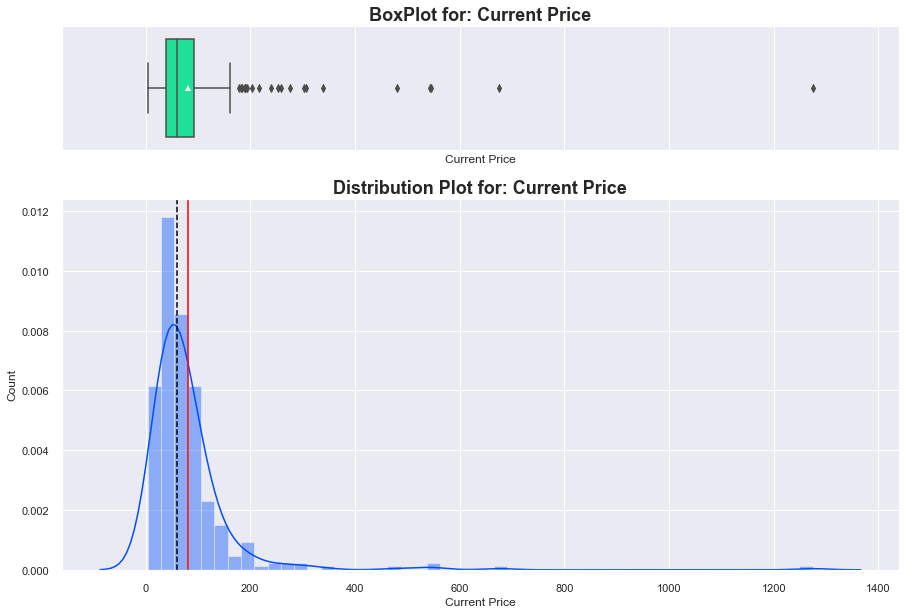

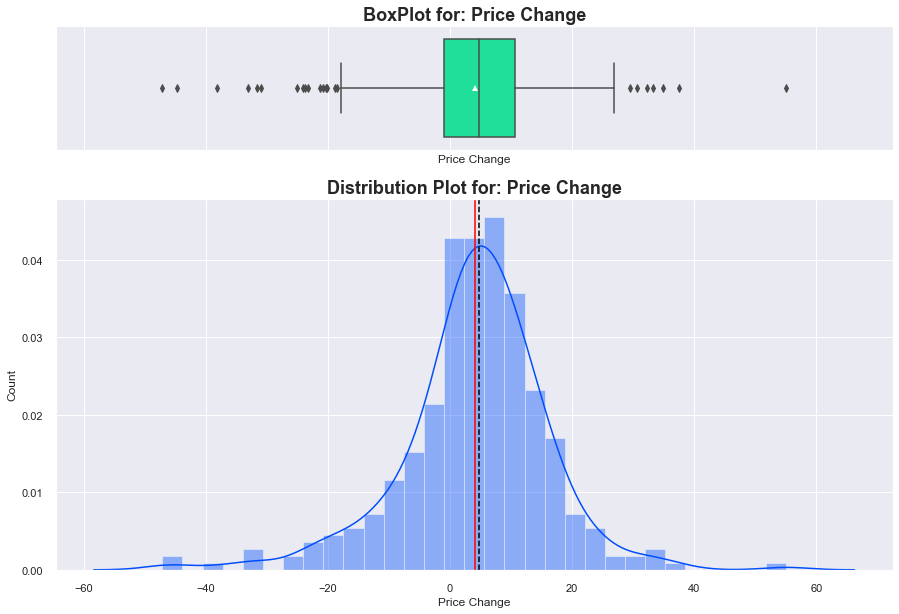

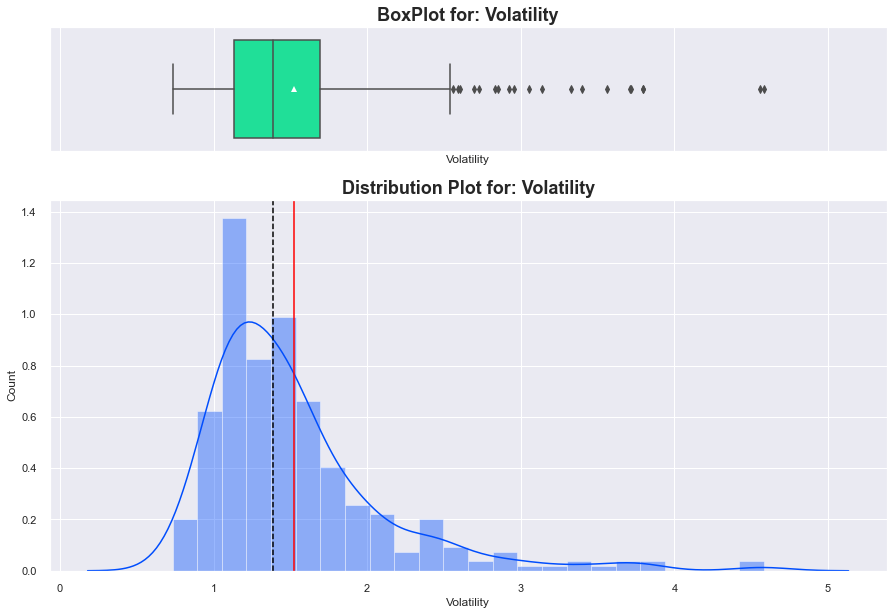

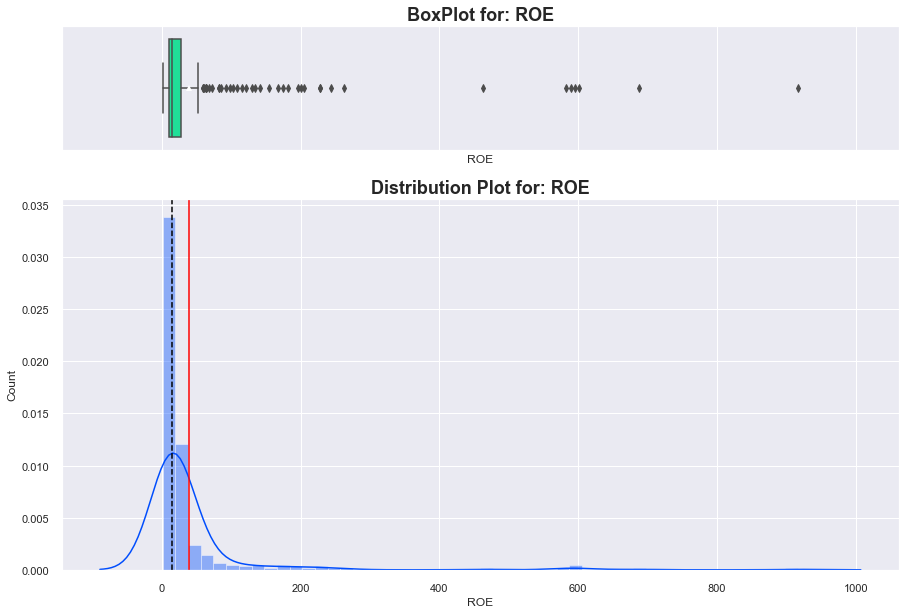

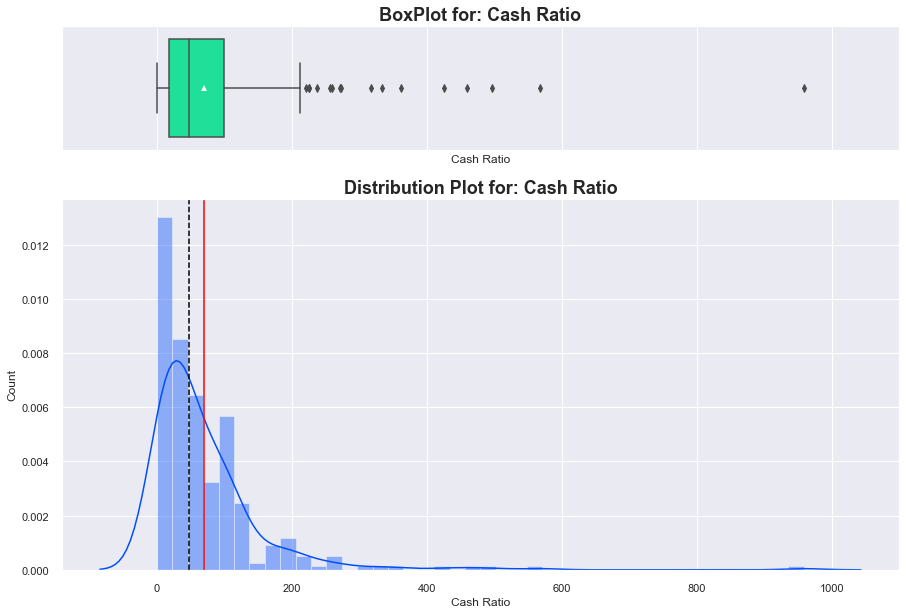

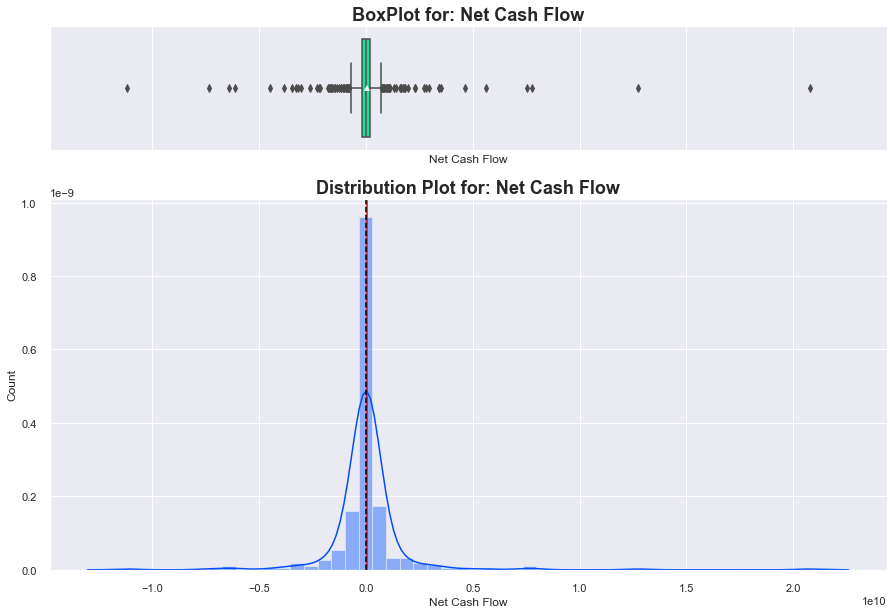

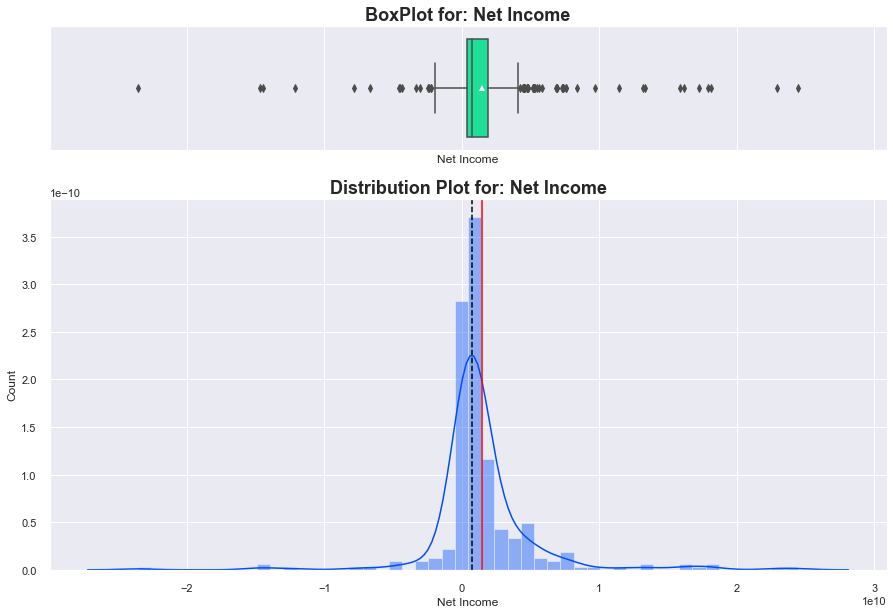

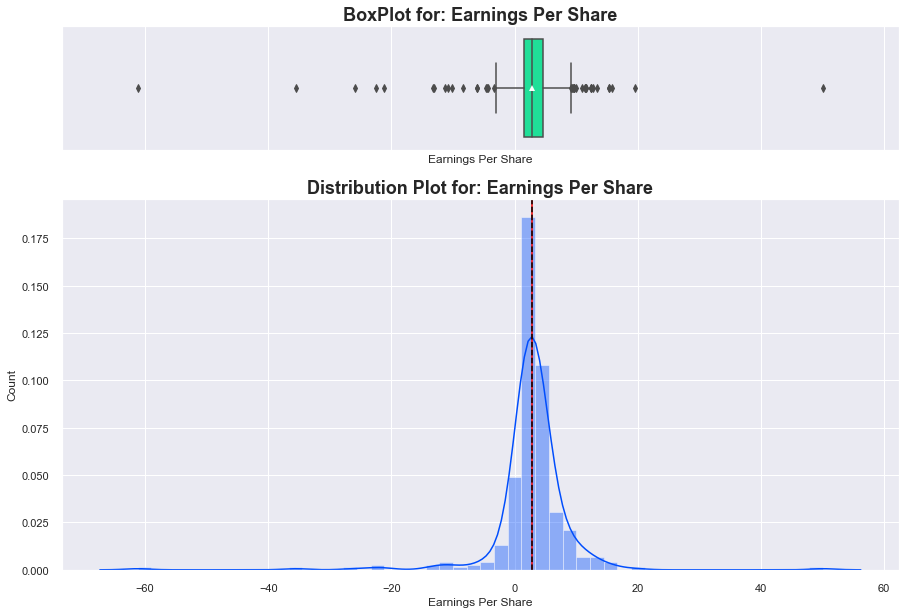

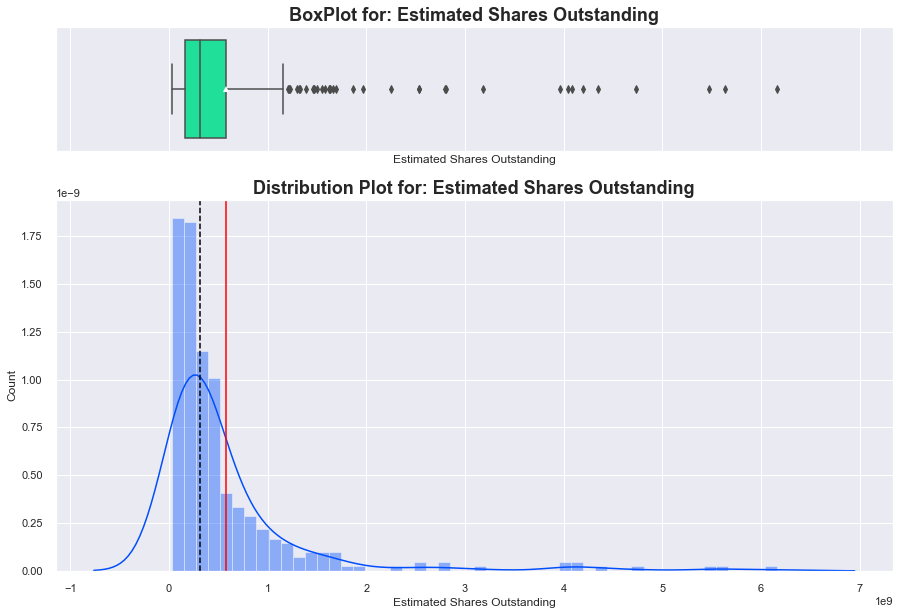

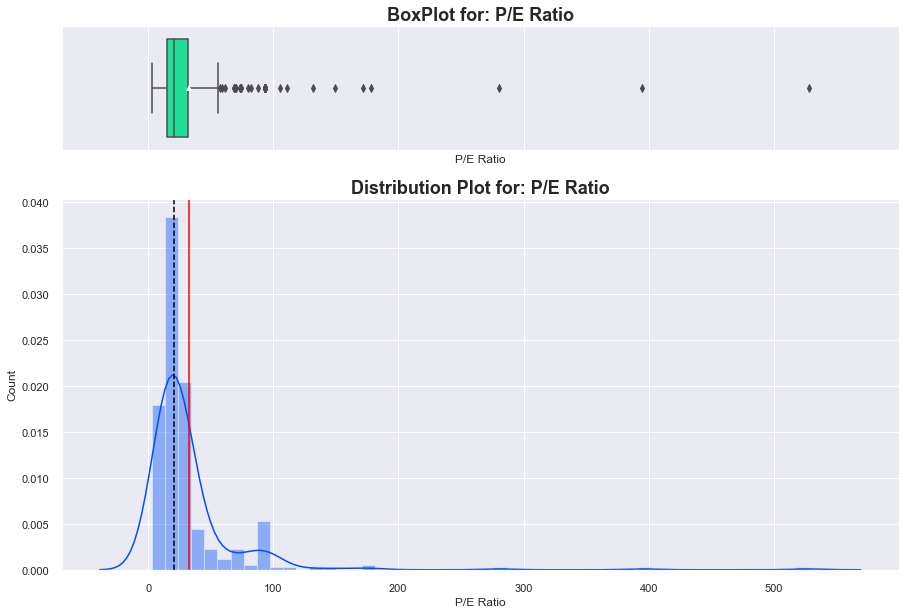

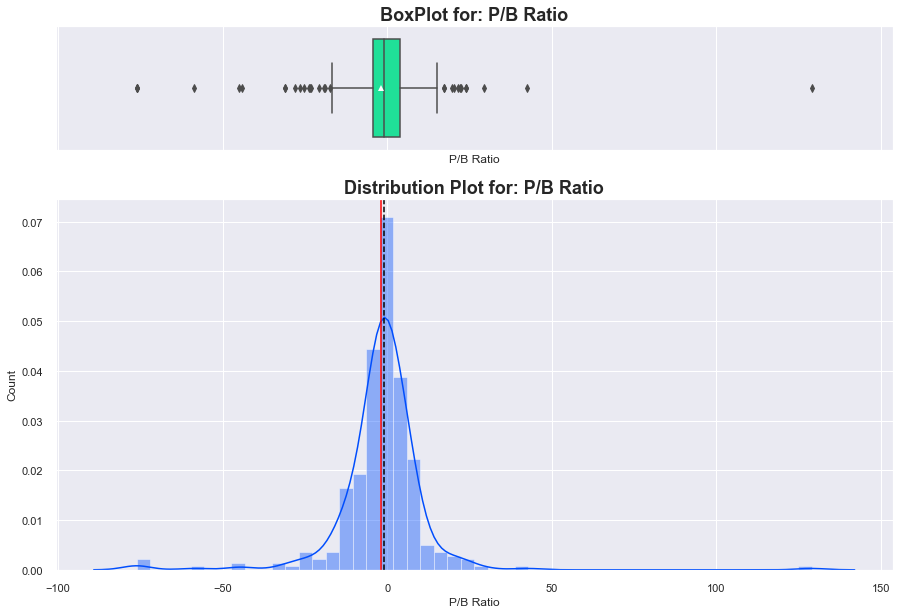

<IPython.core.display.Javascript object>

In [15]:
# Write a loop which will plot boxplot and histogram for all variables in dependent_vars list
for col in numeric_columns:
    box_hist(df[col], col)

#### Observations:

- `Current Price`
    - Data has outliers to the right.
    - Distribution is skweded to the right
    - We can observe majority of stocks in dataset are below ~100 where as highest stock price is close to ~1300
- `Price Change`
    - Data shows outliers on both sides
    - Distribution of the data looks close to normal, with mean and median being close to each other.
    - Data is distributed between ~-60 to +65
- `Volatility`
    - Data has outliers to the right
    - Distribution is skewed to the right, with data distributed from ~.7 to ~5.1
- `ROE`
    - Data has lot of outliers to the right
    - Data is heavily right skewed, with data distributed from ~0 to ~1000
- `Cash Ratio`
    - Data is skewed to the right and with outliers on the right.
- `Net Cash Flow`
    - Data shows lot of outliers on both sides.
    - Data looks normally distributed, however has long tails on both sides
- `Net Income`
    - Data has outliers on both sides
    - Data looks slightly right skewed and has long tails
- `Earnings Per Share`
    - Data looks normally distributed, mean and mdeian are almost same
    - Data has outliers to both sides, which shows in boxplot as well as long tails on both side.
- `Estimated Shares Outstanding`
    - Data is right skewed and has outliers to the right
- `P/E Ratio`
    - Data has outliers to the right and distribution shows right skewed
- `P/B Ratio`
    - Data is close to normally distributed, has outliers to both sides and shows as long tails in distribution

### Checking the proportions in GICS Sector

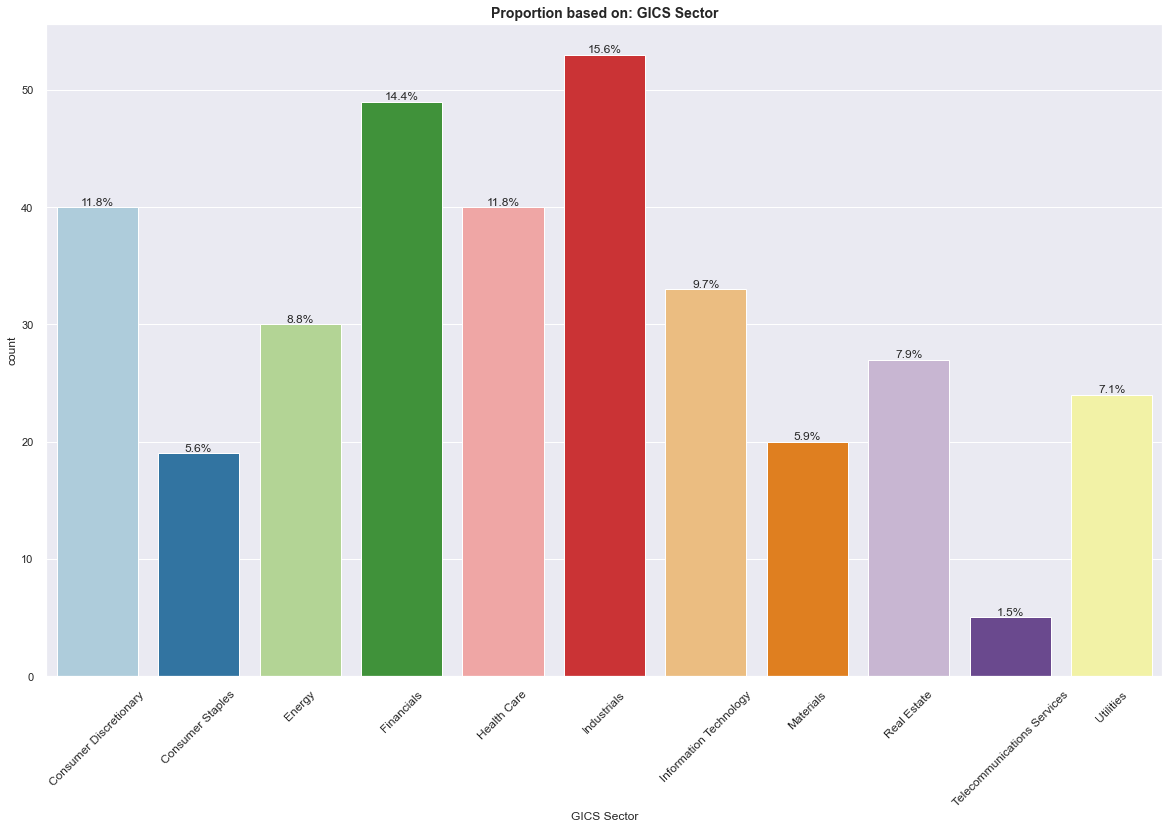

<IPython.core.display.Javascript object>

In [16]:
labeled_barplot(df, "GICS Sector", perc=True)

#### Observations:

- As we have observed earlier, from this visualization we can see that Industrial sector has the highest observations with ~15.6%
- Financials and Consumer Discretionary are the next two sectors which has higher observations
- Telecommunications Services shows the lowest observations in dataset

### Checking GICS Sub Industry

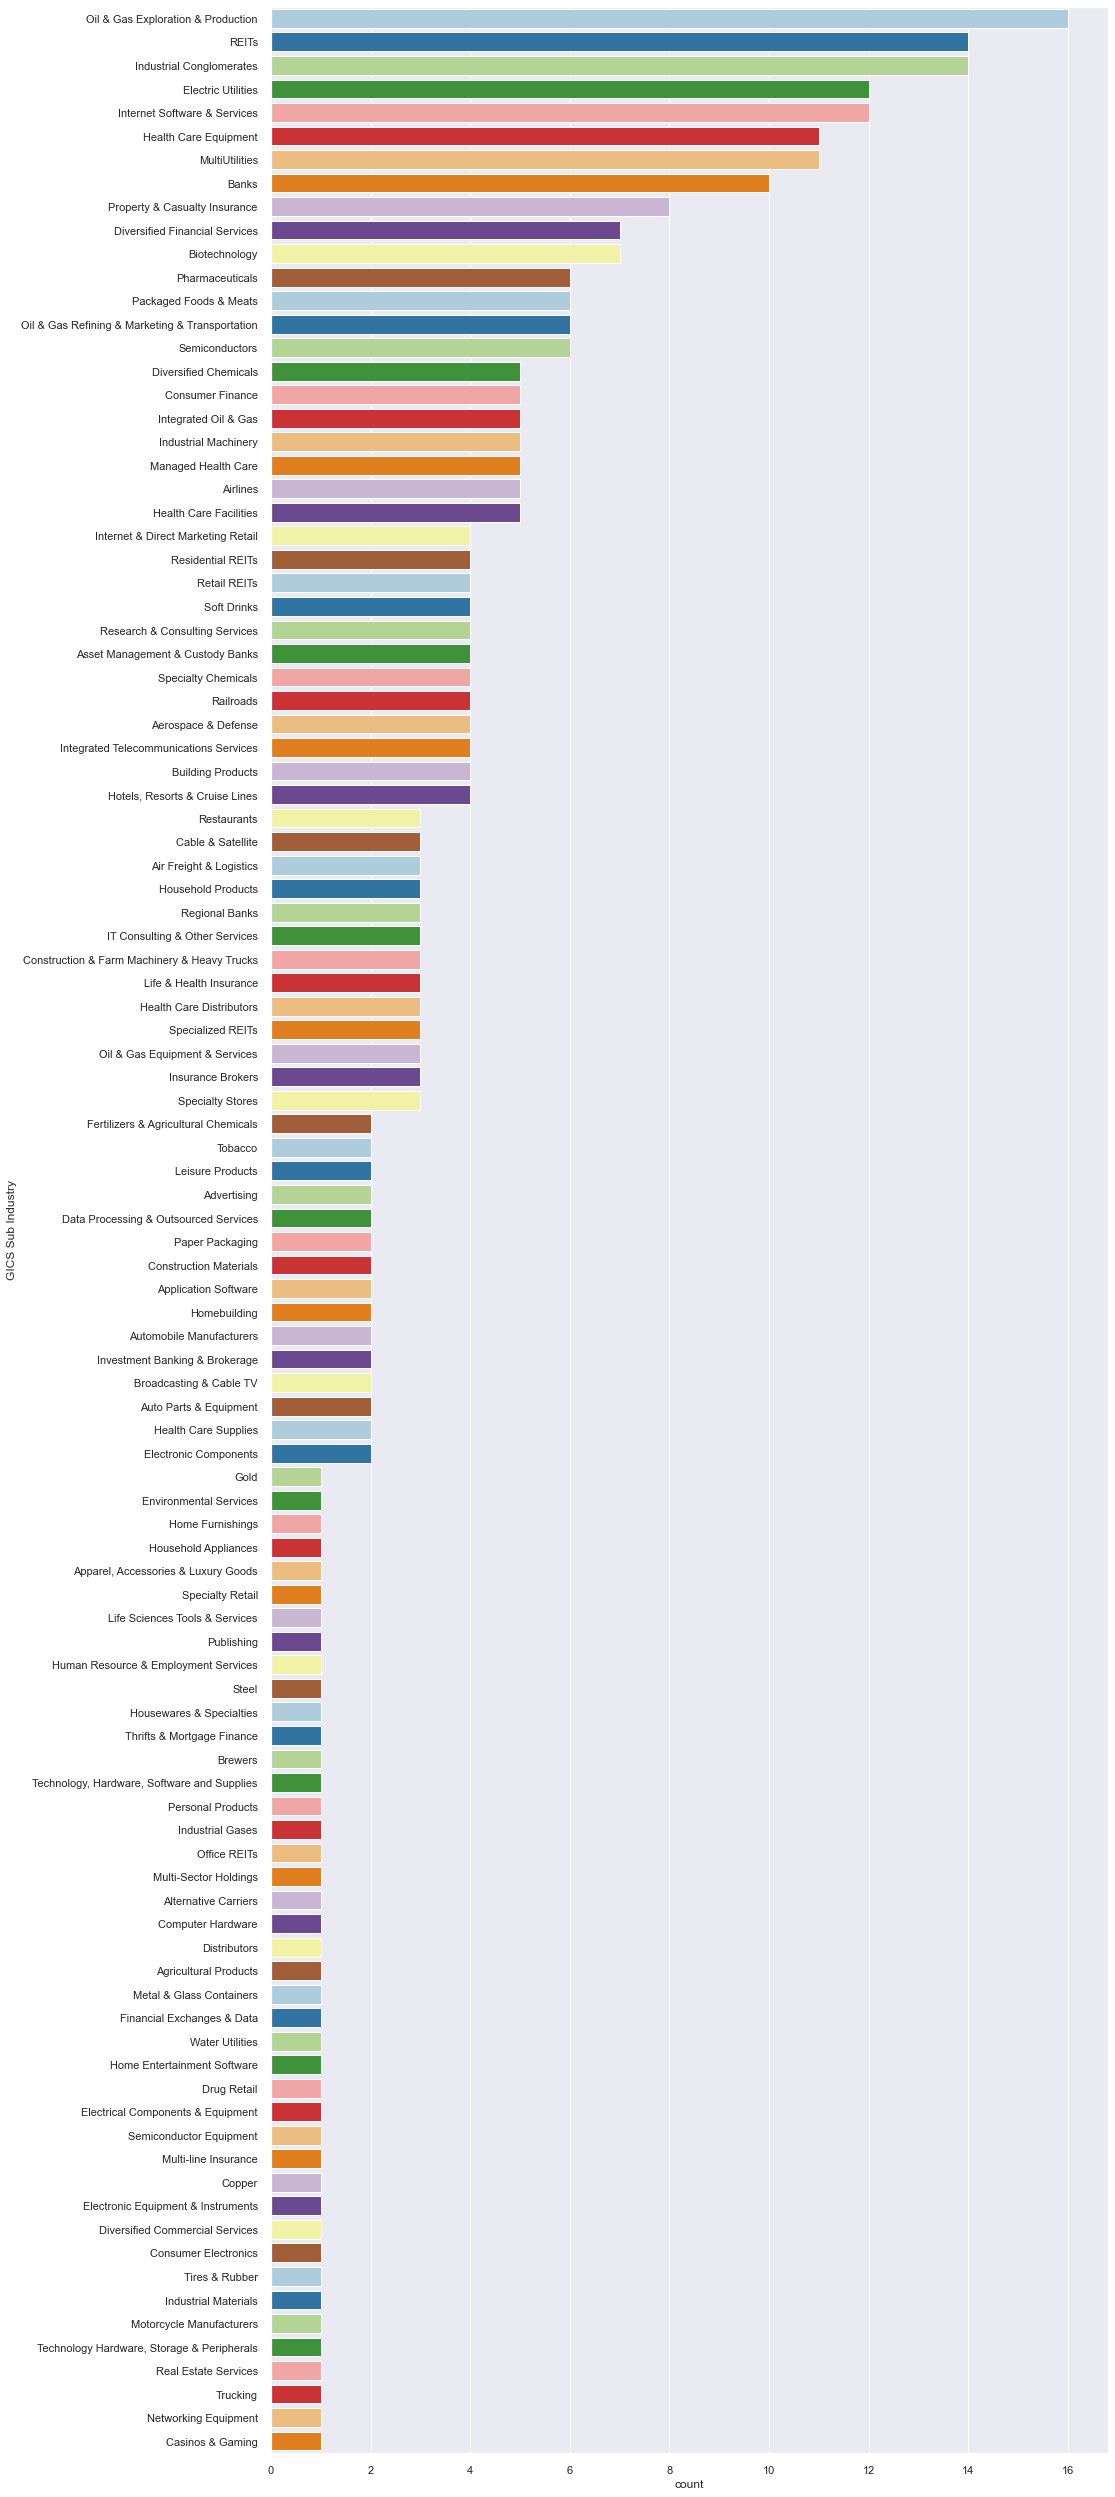

<IPython.core.display.Javascript object>

In [17]:
fig, ax = plt.subplots(figsize=(15, 45))  # figsize and axis declaration
sns.set_style("darkgrid")  # seaborn background set to dark
ax = sns.countplot(
    y="GICS Sub Industry",
    data=df,
    orient="v",
    palette="Paired",
    order=df["GICS Sub Industry"].value_counts().index,
)  # plotting the countplot
plt.show()

#### Observations:

- Oil & Gas Exploration and Production shows the highest proprotion in dataset with 16 observations.
- REITs, Industrial Conglomerates are next two highest sub sector with 14 observations.
- There are many subsectors which has only 1 observation in the dataset

### Bivariate Analysis

### Let's plot the pairplot and try to identify any relationship among variables

<Figure size 1440x864 with 0 Axes>

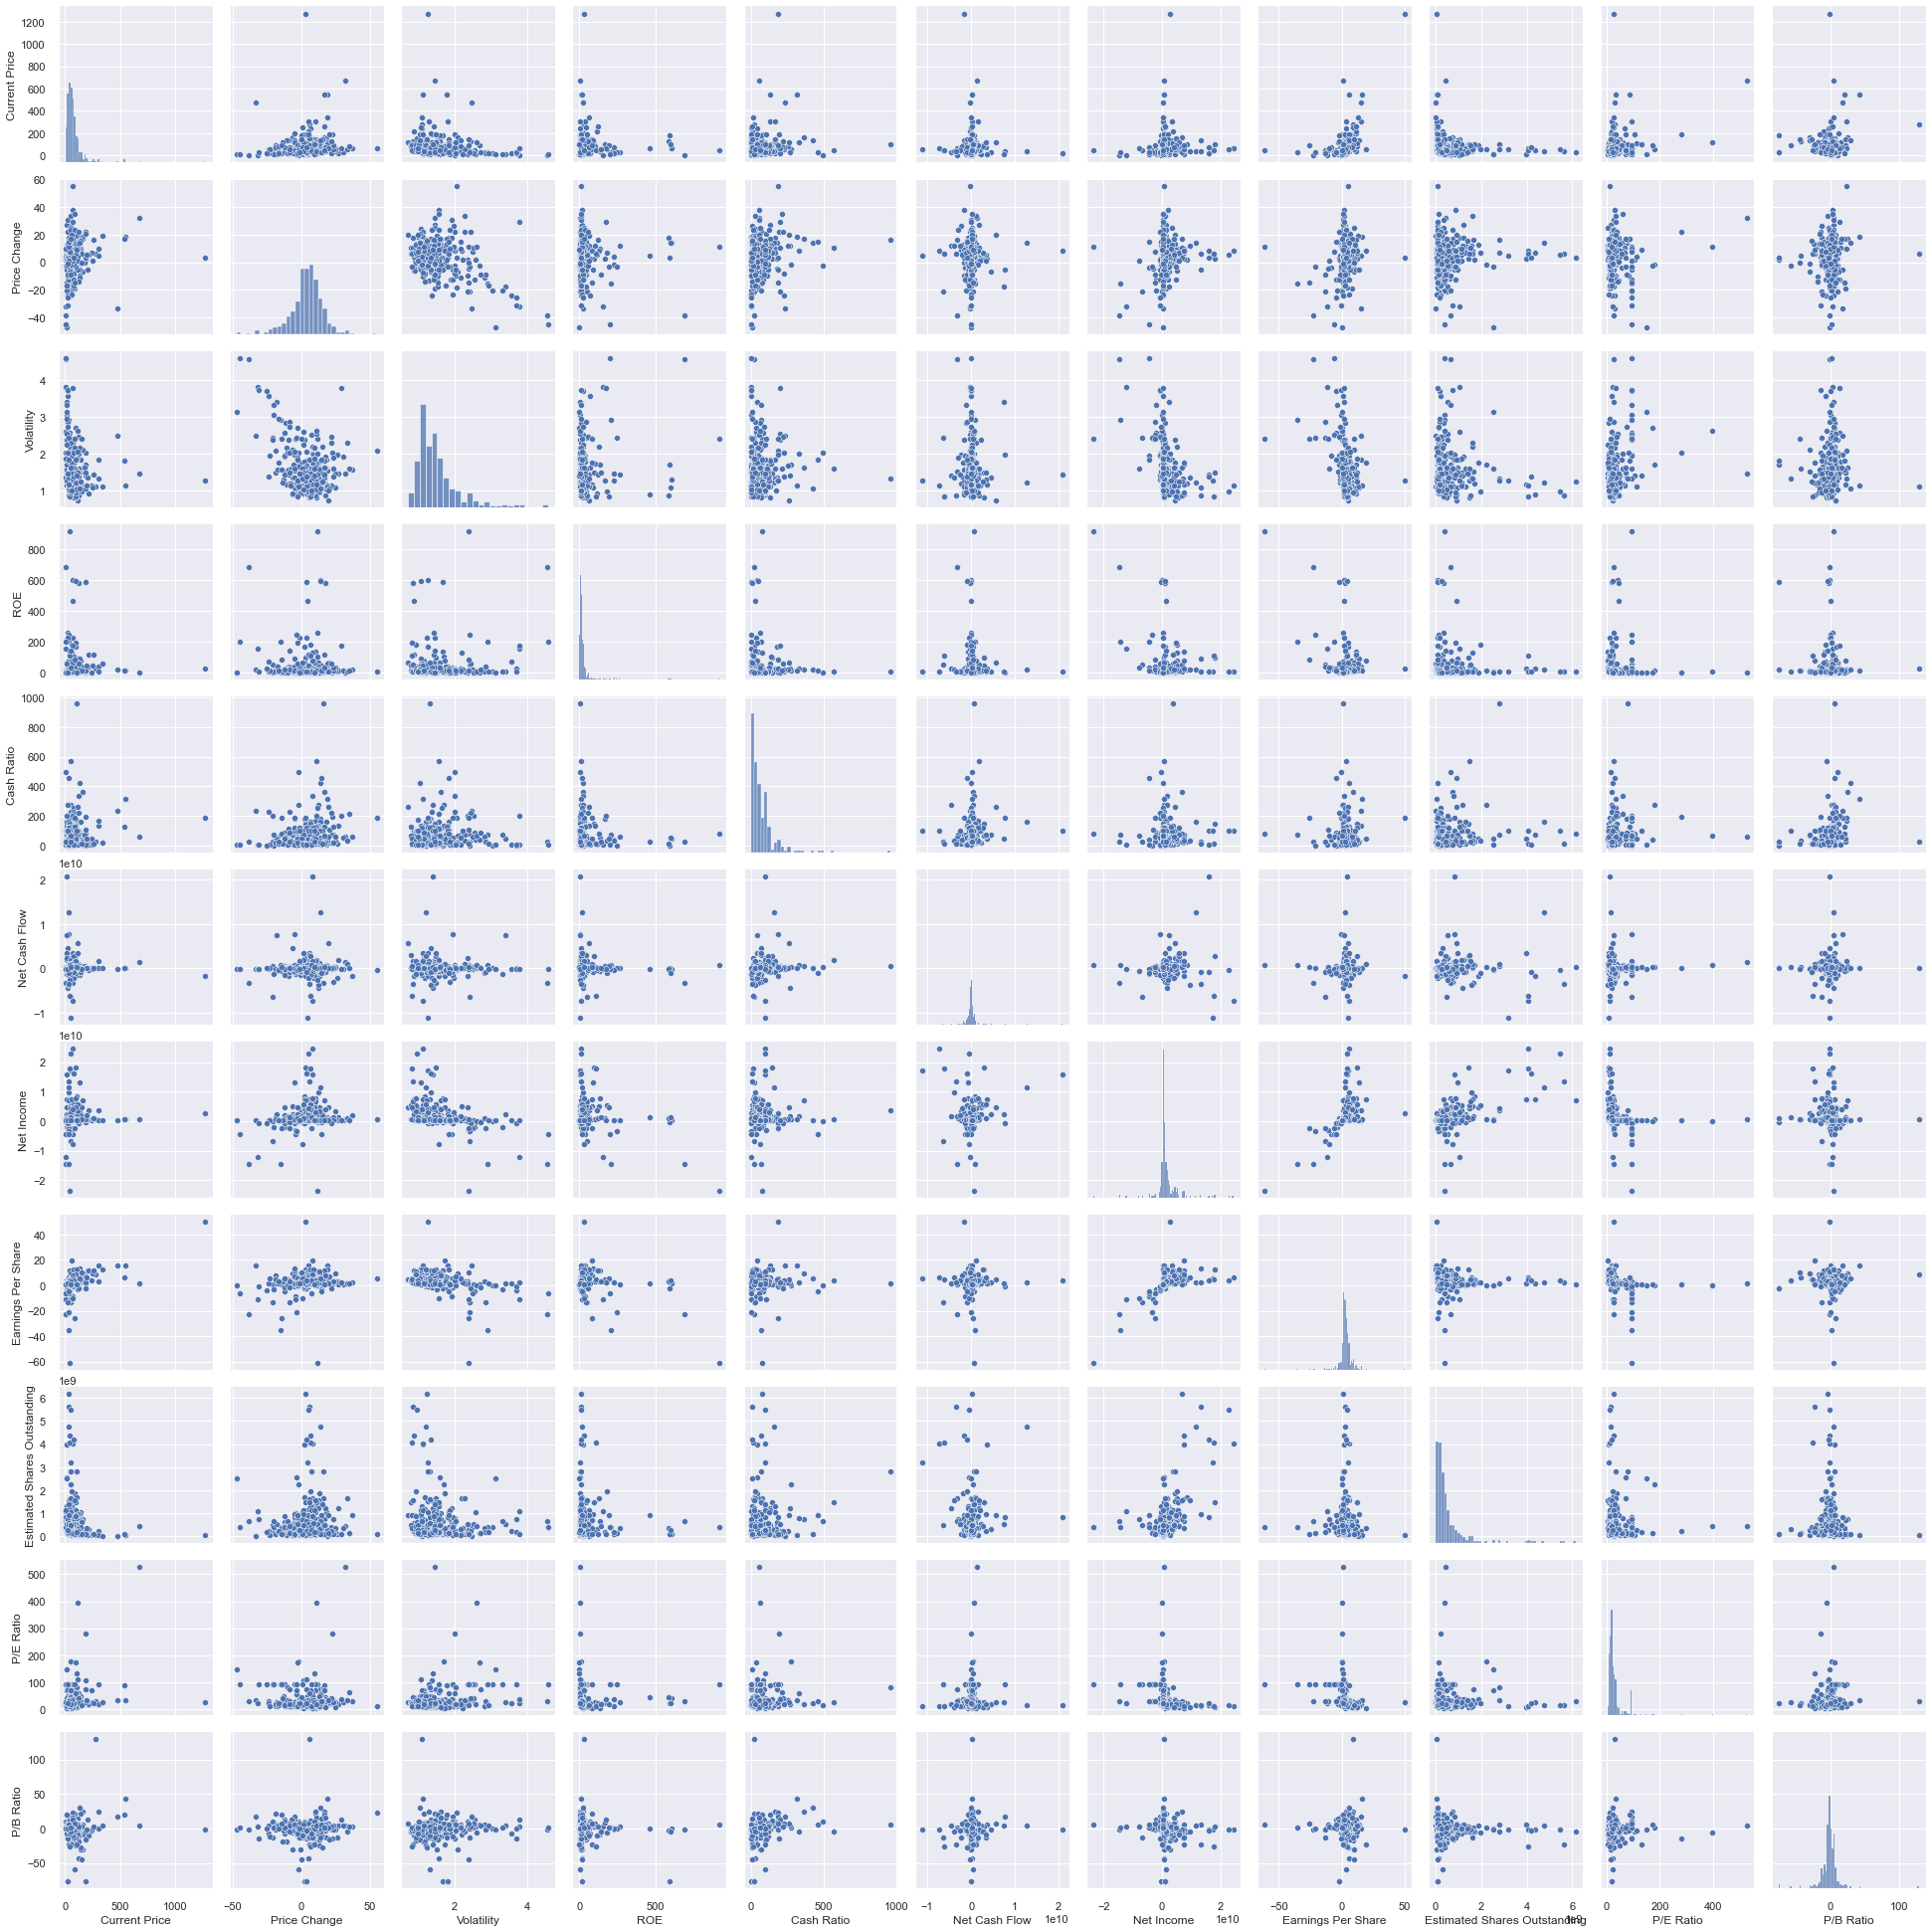

<IPython.core.display.Javascript object>

In [18]:
# plotiing pairplot for all the variables to observe any patterns with target variable
sns.set(style="ticks")
sns.set_style("darkgrid")
plt.figure(figsize=(20, 12))
sns.pairplot(df)
plt.show()

#### Observations:

- We can't observe any strong relationship among the variables except the few noted below which visually shows some relationships
- Current price and Price change doesn't show strong relation ship, however from the plot we can observe for some it has positive linear relationship
- Price change and volatility shows negative linear relationship, in another words with increasing volatility price changes decreases
- Estimated shares outstanding and volatility shows negative linear relationship, which mean with increase in outstanding shares volatility decreases
- Net Income and Earning per share shows positive linear relatioship, meaning with increase in Net income the earning per share increases
- Net Income and Estimated shares outstanding shows positive linear relationship

### Let's also check the heatmap of correlation of the variables

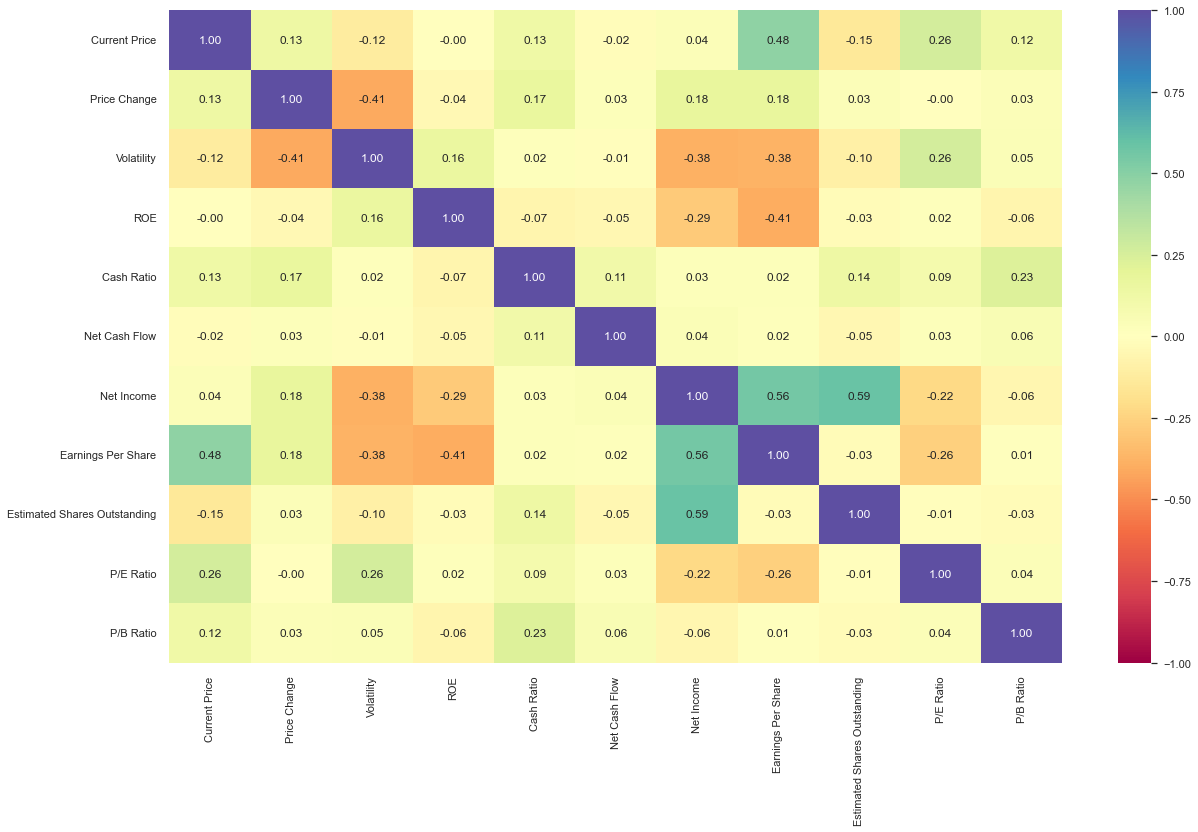

<IPython.core.display.Javascript object>

In [19]:
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap="Spectral", fmt=".2f")
plt.show()

#### Observations:

- As noted from the pairplot, observations are similar through this correlation heatmap
- Volatility and Price change shows negative correlation
- Net Income shows positive correlation with Earnings per share and Estimated shares outstanding
- Earnings per share and Current price shows some positive correlation
- Volatility and Earnings per share shows some negative correlation
- Earnings per share also shows negative correlation with ROE

### Checking Price Change vs GICS Sector

- **Key question to answer**
    - The stocks of which economic sector have seen the maximum price increase on average?

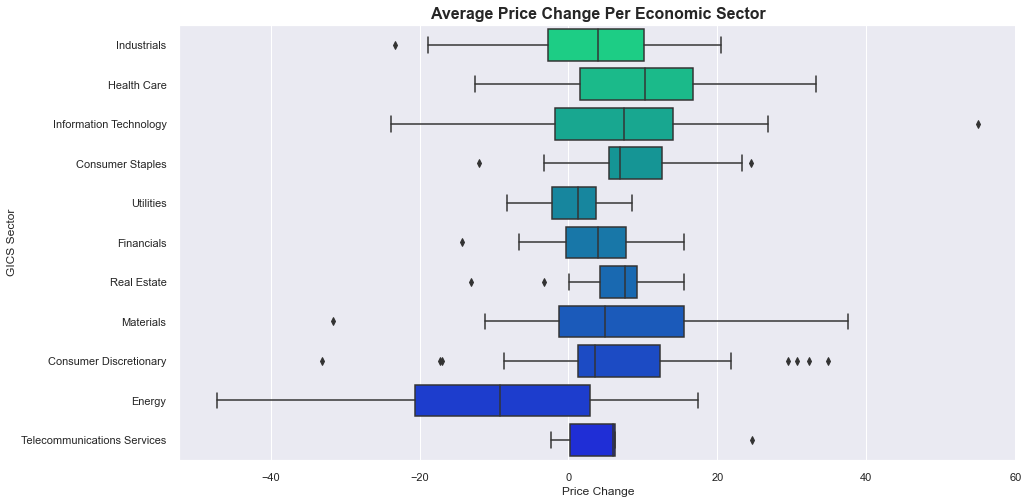

<IPython.core.display.Javascript object>

In [20]:
# plots boxplots for price change by GICS Sector
fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.boxplot(df["Price Change"], df["GICS Sector"], orient="h", palette="winter_r",)
plt.title("Average Price Change Per Economic Sector", fontsize=16, fontweight="bold")
plt.show()

#### Observations:

- We can observe that price changes varies by economic sector, from the above box plot we can see some economic sectors have on average positive/increase in price, some has negative/decrease in price
- Health care and Materials shows the maximum positive price change.
- However, on average Health care has the maximum price change, so we can see maximum price increase happened for **Health Care** sector

### Checking Cash Ratio vs Economic Sector

- **Key question to be answer**
    - How does the average cash ratio vary across economic sectors?

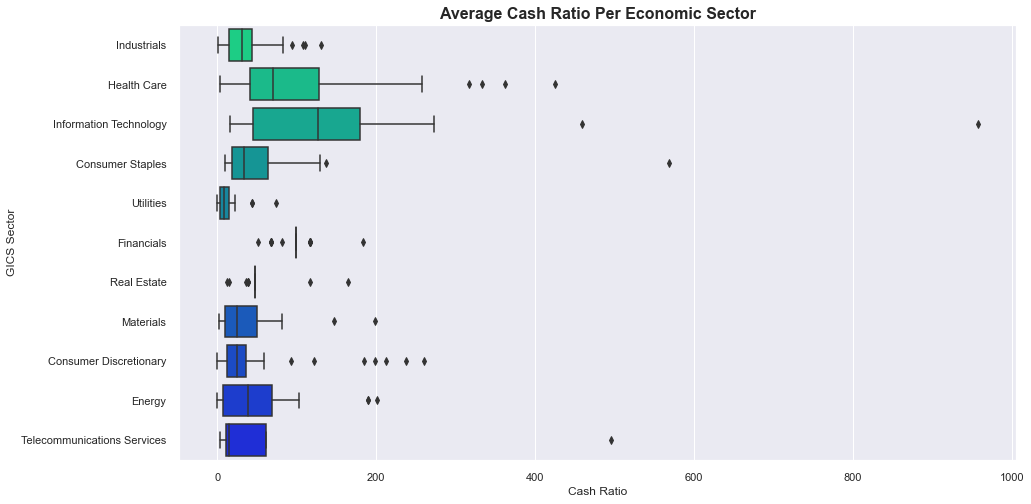

<IPython.core.display.Javascript object>

In [21]:
# plots boxplots for cash ratio by each economic sector
fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.boxplot(df["Cash Ratio"], df["GICS Sector"], orient="h", palette="winter_r",)
plt.title("Average Cash Ratio Per Economic Sector", fontsize=16, fontweight="bold")
plt.show()

#### Observations:

- We can observe on average Information Technology sector has the highest cash ratio.
- Utilities sector shows the lowest average cash ratio
- Health care sector shows the second highest cash ratio on average

### Checking P/E ratio vs GICS Sector

- **Key question to be answer**
    - How does the P/E ratio vary, on average, across economic sectors?

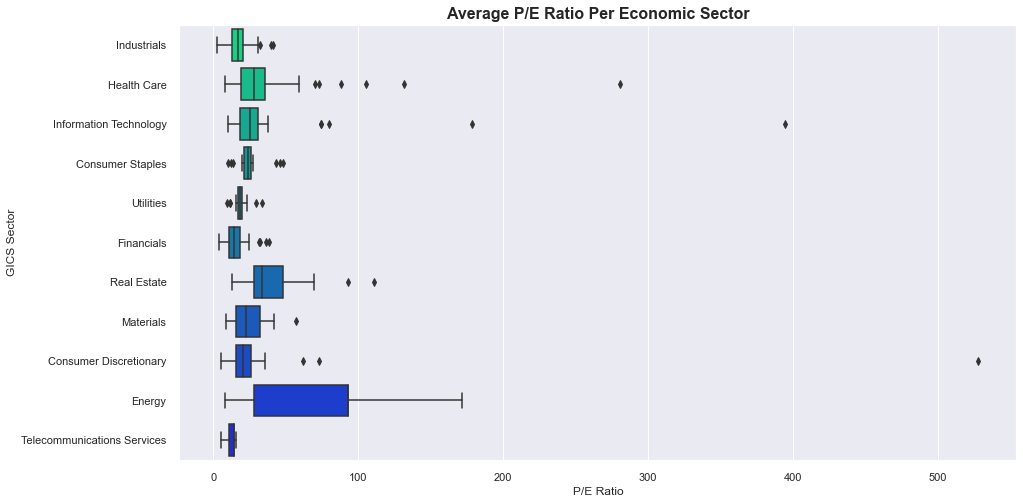

<IPython.core.display.Javascript object>

In [22]:
# plots boxplots for P/E ratio by each economic sector
fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.boxplot(df["P/E Ratio"], df["GICS Sector"], orient="h", palette="winter_r",)
plt.title("Average P/E Ratio Per Economic Sector", fontsize=16, fontweight="bold")
plt.show()

#### Observations:

- Energy sector shows the highest P/E ratio on average.
- Real Estate sector shows the second highest P/E ratio. 
- On average all other sectors have P/E ratio closer to each other, with Telecommunication Services being the lowest

### Checking estimated shares outstanding by GICS sector

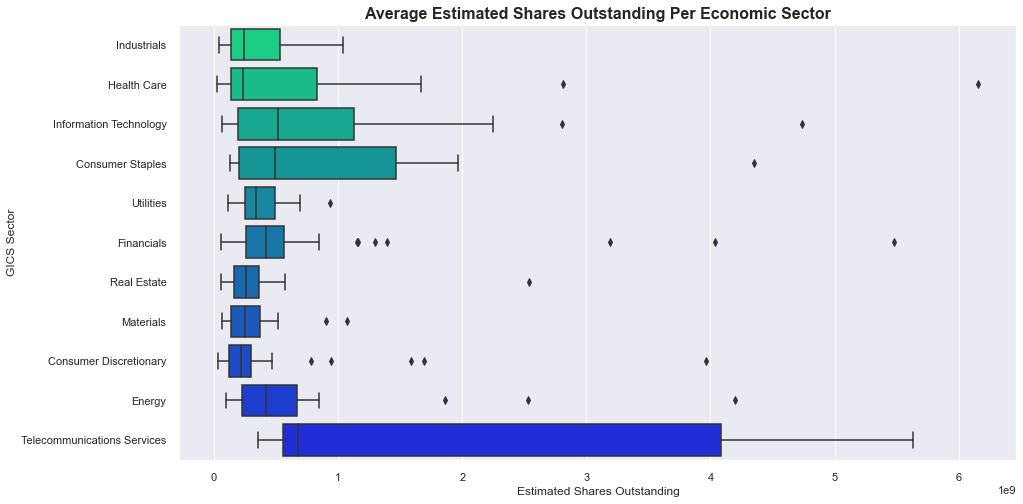

<IPython.core.display.Javascript object>

In [23]:
# plots boxplots for estimated shares outstanding by each economic sector
fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.boxplot(
    df["Estimated Shares Outstanding"],
    df["GICS Sector"],
    orient="h",
    palette="winter_r",
)
plt.title(
    "Average Estimated Shares Outstanding Per Economic Sector",
    fontsize=16,
    fontweight="bold",
)
plt.show()

#### Observations:

- Telecommunication services sector shows it has highest estimated shares outstanding on average
- Consumer Discretionary shows the lowest average estimated shares outstanding

## Data Preprocessing

- **Duplicate value check**
    - We have observed earlier that we do not have any duplicate observations in the dataset. So we don't need any special treatment.
    
- **Missing value treatment**
    - We have seen that the dataset doesn't have any missing values or the categorical columns has any unknown values. Let's also check if the numerical columns have any hidden missing values

In [24]:
for col in numeric_columns:
    print(f"Unique values in numeric column {col}")
    print(df[col].value_counts())
    print("*" * 50)

Unique values in numeric column Current Price
54.36000     2
114.38000    2
43.23000     2
32.93000     2
103.89000    1
            ..
51.07000     1
52.13000     1
81.59000     1
302.39999    1
47.92000     1
Name: Current Price, Length: 336, dtype: int64
**************************************************
Unique values in numeric column Price Change
9.99999     1
6.23785     1
6.58555     1
5.79688     1
9.52997     1
           ..
8.03760     1
10.01965    1
-4.07859    1
3.65424     1
16.67884    1
Name: Price Change, Length: 340, dtype: int64
**************************************************
Unique values in numeric column Volatility
1.68715    1
1.02338    1
1.46062    1
1.28157    1
2.16881    1
          ..
1.05619    1
1.30808    1
1.94110    1
1.40451    1
1.61028    1
Name: Volatility, Length: 340, dtype: int64
**************************************************
Unique values in numeric column ROE
10     24
9      16
14     16
11     16
17     15
8      14
7      13
13     1

<IPython.core.display.Javascript object>

#### Observations:

- We do see there are values in negative and 0, but they seem to be possible values for the variable, hence we don't see any missing values which should be treated

- **Outlier check**
    - We have observed outliers present for almost each variables, however we will not treat them, as we do not have much knowledge on how the outliers can be treated, hence we will go ahead without treating them and see how clustering algorithms can perform.
- **Feature engineering (if needed)**
    - We will not do any feture engineering for the dataset, cause most important features are present in the dataset.

#### Let's take a copy of the dataset where we will do outliers check and treatment

In [25]:
df_outrm = df.copy()

<IPython.core.display.Javascript object>

#### Let's plot boxplots to check the outliers

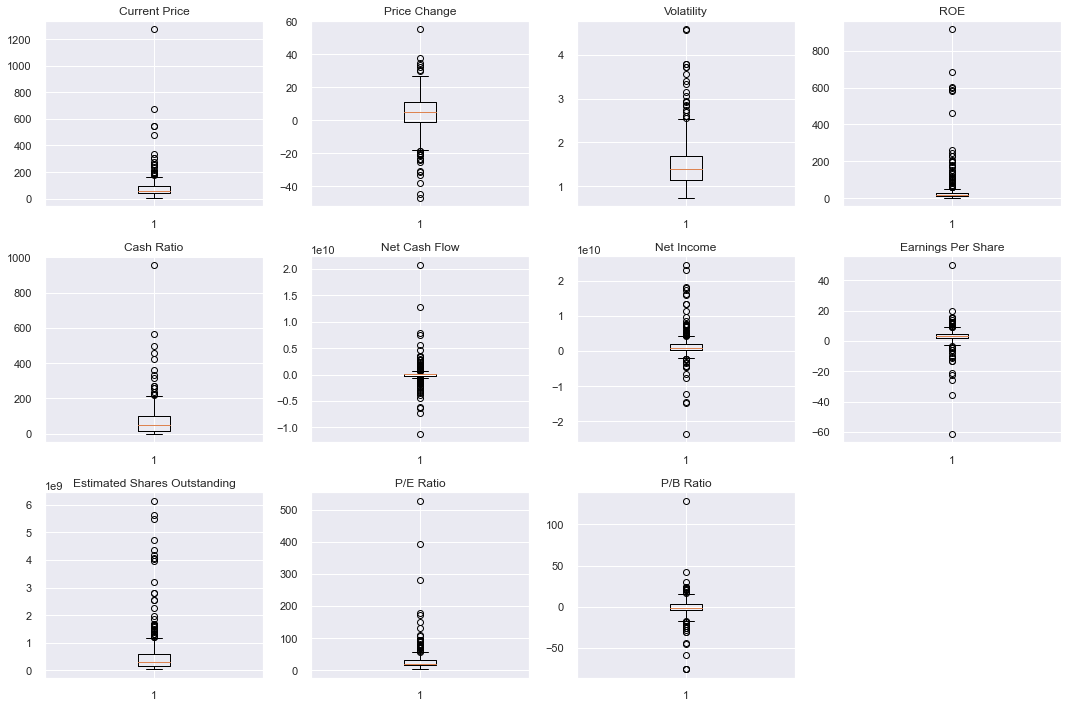

<IPython.core.display.Javascript object>

In [26]:
# let's plot the boxplots of all columns to check for outliers
plt.figure(figsize=(15, 10))

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df_outrm[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

#### Observations:

- We can see all the variables have outliers.
- We will treat them in this copied dataset, so that we can perform clustering on both and compare

#### Let's write a function which will treat the outliers

In [27]:
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: data frame
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

<IPython.core.display.Javascript object>

#### Treating outliers

In [28]:
# treating the outliers except ram
df_outrm = treat_outliers_all(df_outrm, numeric_columns)
df_outrm

Ticker Symbol                 Security             GICS Sector  \
0             AAL  American Airlines Group             Industrials   
1            ABBV                   AbbVie             Health Care   
2             ABT      Abbott Laboratories             Health Care   
3            ADBE        Adobe Systems Inc  Information Technology   
4             ADI     Analog Devices, Inc.  Information Technology   
..            ...                      ...                     ...   
335          YHOO               Yahoo Inc.  Information Technology   
336           YUM          Yum! Brands Inc  Consumer Discretionary   
337           ZBH   Zimmer Biomet Holdings             Health Care   
338          ZION            Zions Bancorp              Financials   
339           ZTS                   Zoetis             Health Care   

                GICS Sub Industry  Current Price  Price Change  Volatility  \
0                        Airlines       42.35000       9.99999     1.68715   
1                 Pharmaceuticals       59.24000       8.33943     2.19789   
2           Health Care Equipment       44.91000      11.30112     1.27365   
3            Application Software       93.94000      13.97720     1.35768   
4                  Semiconductors       55.32000      -1.82786     1.70117   
..                            ...            ...           ...         ...   
335  Internet Software & Services       33.26000      14.88773     1.84515   
336                   Restaurants       52.51618      -8.69892     1.47888   
337         Health Care Equipment      102.59000       9.34768     1.40421   
338                Regional Banks       27.30000      -1.15859     1.46818   
339               Pharmaceuticals       47.92000      16.67884     1.61028   

         ROE  Cash Ratio    Net Cash Flow        Net Income  \
0   52.87500    51.00000 -604000000.00000  4219048125.00000   
1   52.87500    77.00000   51000000.00000  4219048125.00000   
2   21.00000    67.00000  715386625.00000  4219048125.00000   
3    9.00000   180.00000 -240840000.00000   629551000.00000   
4   14.00000   220.50000  315120000.00000   696878000.00000   
..       ...         ...              ...               ...   
335 15.00000   220.50000 -739482375.00000 -1967746875.00000   
336 52.87500    27.00000  159000000.00000  1293000000.00000   
337  1.00000   100.00000  376000000.00000   147000000.00000   
338  4.00000    99.00000  -43623000.00000   309471000.00000   
339 32.00000    65.00000  272000000.00000   339000000.00000   

     Earnings Per Share  Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
0               9.21375               668129938.50000    3.71817   -8.78422  
1               3.15000              1194521319.16250   18.80635   -8.75007  
2               2.94000              1194521319.16250   15.27551   -0.39417  
3               1.26000               499643650.80000   56.84491    4.19965  
4               0.31000              1194521319.16250   56.84491    1.05981  
..                  ...                           ...        ...        ...  
335            -3.03625               939457327.60000   28.97619    6.26177  
336             2.97000               435353535.40000   17.68221   -3.83826  
337             0.78000               188461538.50000   56.84491  -16.75574  
338             1.20000               257892500.00000   22.75000   -0.06310  
339             0.68000               498529411.80000   56.84491    1.72307  

[340 rows x 15 columns]

<IPython.core.display.Javascript object>

#### Let's check if the outliers are treated

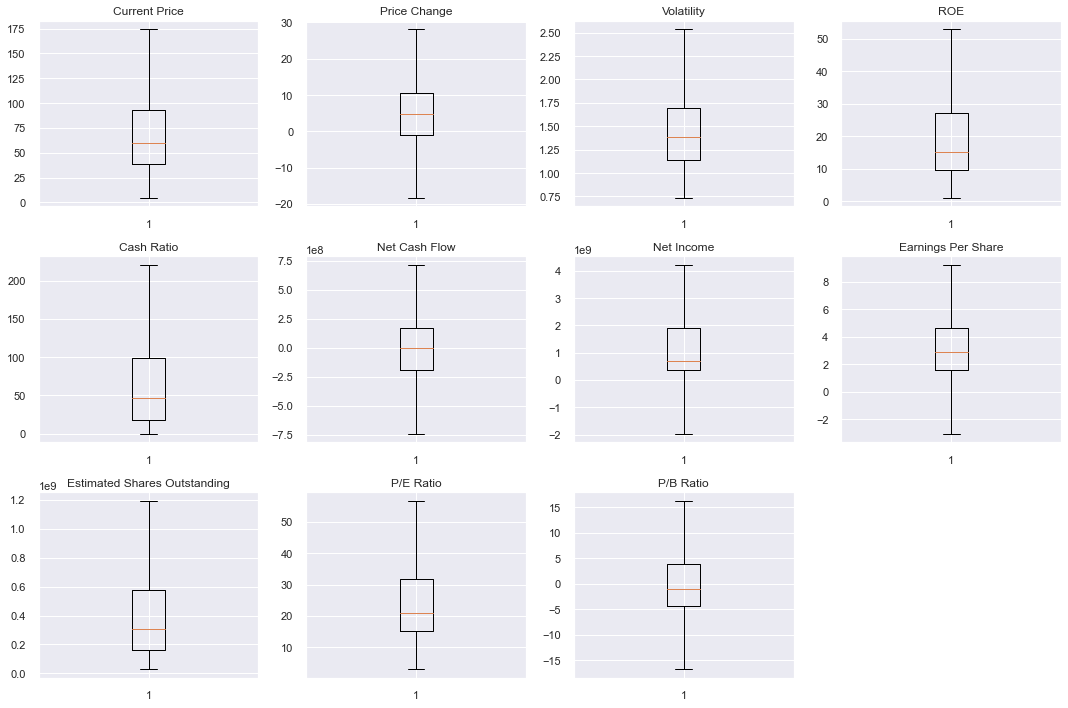

<IPython.core.display.Javascript object>

In [29]:
# let's plot the boxplots of all columns to check for outliers
plt.figure(figsize=(15, 10))

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df_outrm[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

#### Observations:

- We can see we have succesfully treated all the outliers.
- We have used 1.5 as whiskers for treating the outliers.
- Any lower ouliers are updated to the lower whisker value, which is (q1 - 1.5 * IQR) and any upper outliers are updated to the upper whisker value, which is (q3 + 1.5 * IQR)

### Scaling 

- We have observed different variables are in different scale, and as we know clustering alogorithms can be highly sensitive to data having variables in higher scale, so it's important to apply scaling before we can proceed for clustering

In [30]:
# scaling the dataset before clustering
scaler = StandardScaler()
subset = df[numeric_columns].copy()
subset_scaled = scaler.fit_transform(subset)

<IPython.core.display.Javascript object>

In [31]:
# Creating a dataframe from the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)
subset_scaled_df

Current Price  Price Change  Volatility      ROE  Cash Ratio  \
0         -0.39334       0.49395     0.27275  0.98960    -0.21070   
1         -0.22084       0.35544     1.13704  0.93774     0.07727   
2         -0.36719       0.60248    -0.42701 -0.19290    -0.03349   
3          0.13357       0.82570    -0.28480 -0.31738     1.21806   
4         -0.26087      -0.49264     0.29647 -0.26551     2.23702   
..             ...           ...         ...      ...         ...   
335       -0.48618       0.90165     0.54012 -0.25514     4.30816   
336       -0.28951      -1.06577    -0.07970  1.06221    -0.47651   
337        0.22191       0.43954    -0.20607 -0.40036     0.33201   
338       -0.54705      -0.43681    -0.09781 -0.36924     0.32093   
339       -0.33645       1.05105     0.14267 -0.07880    -0.05564   

     Net Cash Flow  Net Income  Earnings Per Share  \
0         -0.33936     1.55442             1.30940   
1         -0.00233     0.92763             0.05675   
2          0.45406     0.74437             0.02483   
3         -0.15250    -0.21982            -0.23056   
4          0.13356    -0.20270            -0.37498   
..             ...         ...                 ...   
335       -0.55967    -1.48778            -1.12748   
336        0.05324    -0.05119             0.02939   
337        0.16489    -0.34247            -0.30353   
338       -0.05102    -0.30117            -0.23968   
339        0.11138    -0.29367            -0.31873   

     Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
0                         0.10786   -0.65249   -0.50665  
1                         1.25027   -0.31177   -0.50420  
2                         1.09802   -0.39150    0.09494  
3                        -0.09162    0.94715    0.42433  
4                         1.97840    3.29331    0.19920  
..                            ...        ...        ...  
335                       0.42911   -0.08212    0.57219  
336                      -0.16774   -0.33715   -0.15201  
337                      -0.46006    2.23363   -1.58939  
338                      -0.37785   -0.22271    0.11868  
339                      -0.09294    0.85490    0.24675  

[340 rows x 11 columns]

<IPython.core.display.Javascript object>

#### Observations:

- We can observe that we only have numerical columns in our subset of dataset.
- All the variables are now in same scale, and we can use this dataset for clustering.

#### Let's also create a scaled dataframe from the dataset we have treated the outliers

In [32]:
# scaling the dataset where we have treated outliers
subset_outrm = df_outrm[numeric_columns].copy()
subset_scaled_outrm = scaler.fit_transform(subset_outrm)
# Creating a dataframe from the scaled data
subset_scaled_df_outrm = pd.DataFrame(subset_scaled_outrm, columns=subset_outrm.columns)
subset_scaled_df_outrm

Current Price  Price Change  Volatility      ROE  Cash Ratio  \
0         -0.65071       0.54929     0.44821  2.11683    -0.20731   
1         -0.25796       0.38791     1.56884  2.11683     0.23858   
2         -0.59118       0.67573    -0.45908  0.03153     0.06709   
3          0.54893       0.93580    -0.27470 -0.75352     2.00502   
4         -0.34912      -0.60018     0.47897 -0.42642     2.69958   
..             ...           ...         ...      ...         ...   
335       -0.86209       1.02429     0.79488 -0.36099     2.69958   
336       -0.41431      -1.26792    -0.00877  2.11683    -0.61891   
337        0.75007       0.48589    -0.17261 -1.27689     0.63303   
338       -1.00068      -0.53513    -0.03225 -1.08063     0.61588   
339       -0.52119       1.19835     0.27956  0.75116     0.03279   

     Net Cash Flow  Net Income  Earnings Per Share  \
0         -1.43376     1.97714             2.11490   
1          0.13301     1.97714             0.01798   
2          1.72223     1.97714            -0.05464   
3         -0.56508    -0.37174            -0.63560   
4          0.76479    -0.32768            -0.96413   
..             ...         ...                 ...   
335       -1.75784    -2.07134            -2.12130   
336        0.39134     0.06241            -0.04427   
337        0.91041    -0.68750            -0.80159   
338       -0.09333    -0.58119            -0.65635   
339        0.66164    -0.56186            -0.83618   

     Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
0                         0.64505   -1.49377   -0.99734  
1                         2.12480   -0.46214   -0.99284  
2                         2.12480   -0.70355    0.10897  
3                         0.17142    2.13868    0.71471  
4                         2.12480    2.13868    0.30069  
..                            ...        ...        ...  
335                       1.40779    0.23321    0.98662  
336                      -0.00931   -0.53900   -0.34517  
337                      -0.70335    2.13868   -2.04846  
338                      -0.50817   -0.19250    0.15263  
339                       0.16829    2.13868    0.38815  

[340 rows x 11 columns]

<IPython.core.display.Javascript object>

#### Observations:

- We can observe we have scaled the dataset where outliers are removed

## EDA

- It is a good idea to explore the data once again after manipulating it.

#### Checking that the distribution of the variables haven't changed

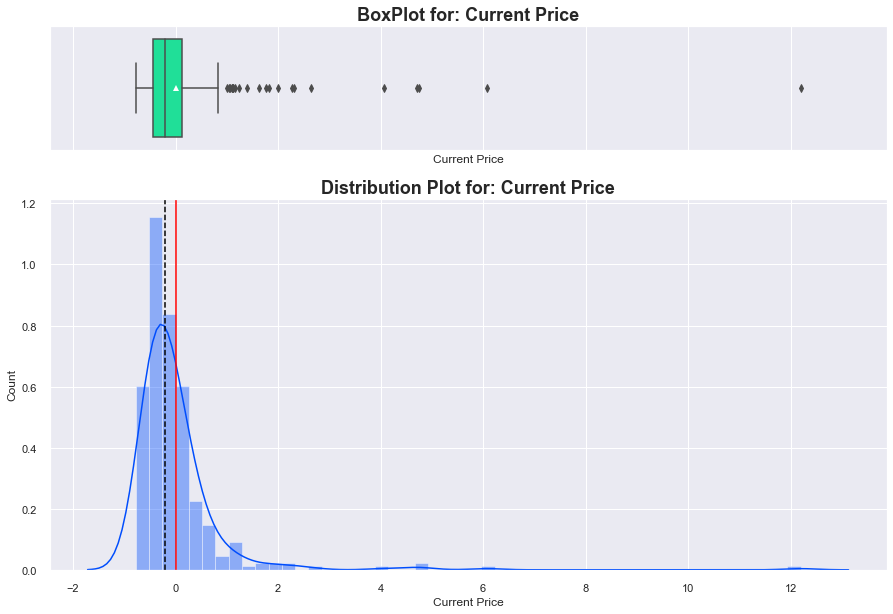

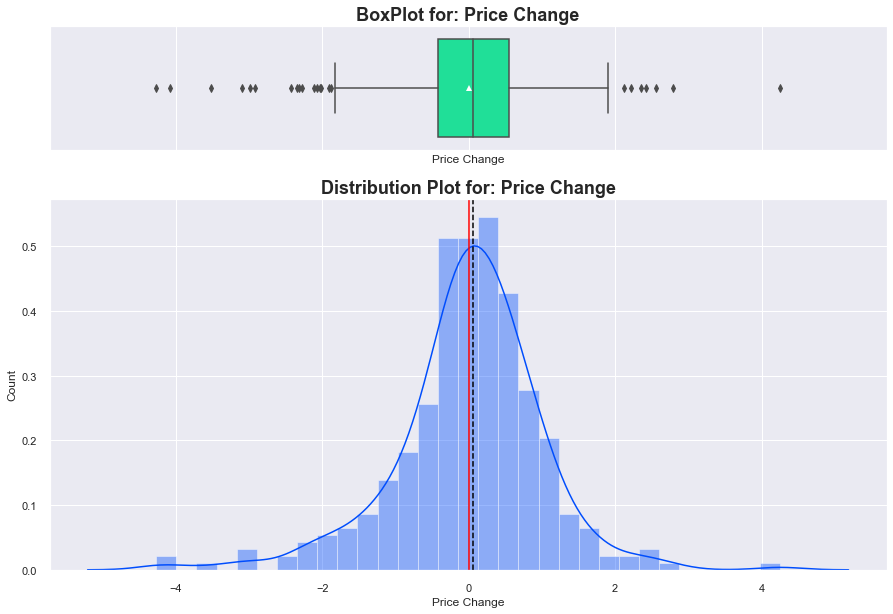

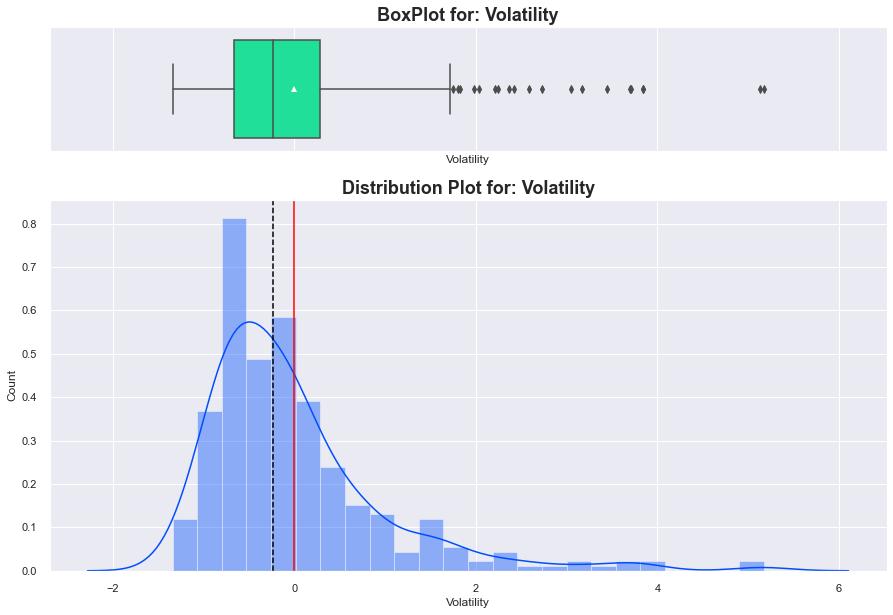

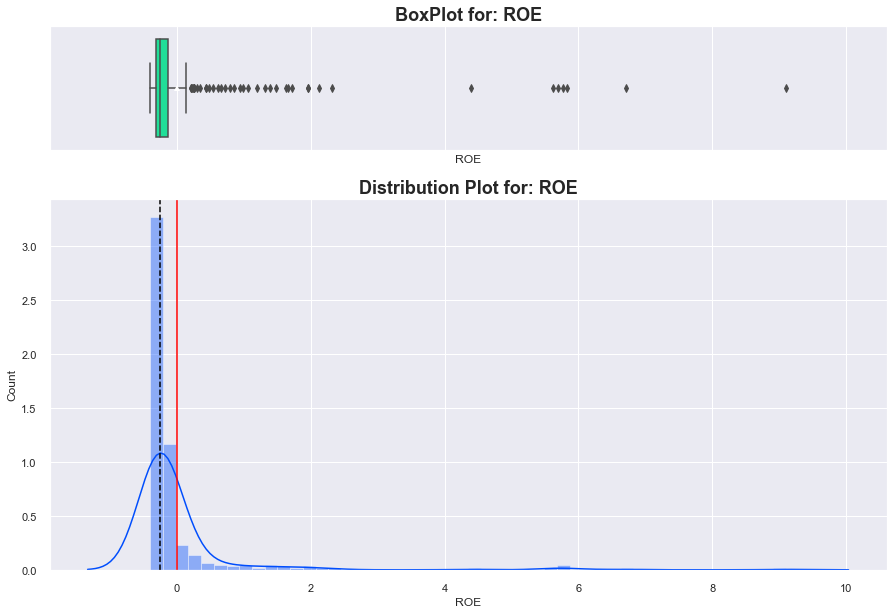

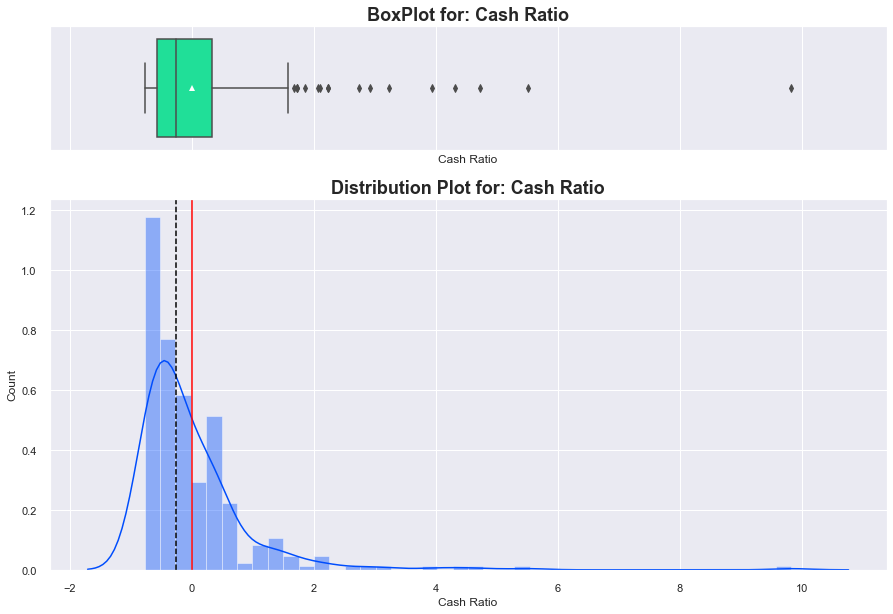

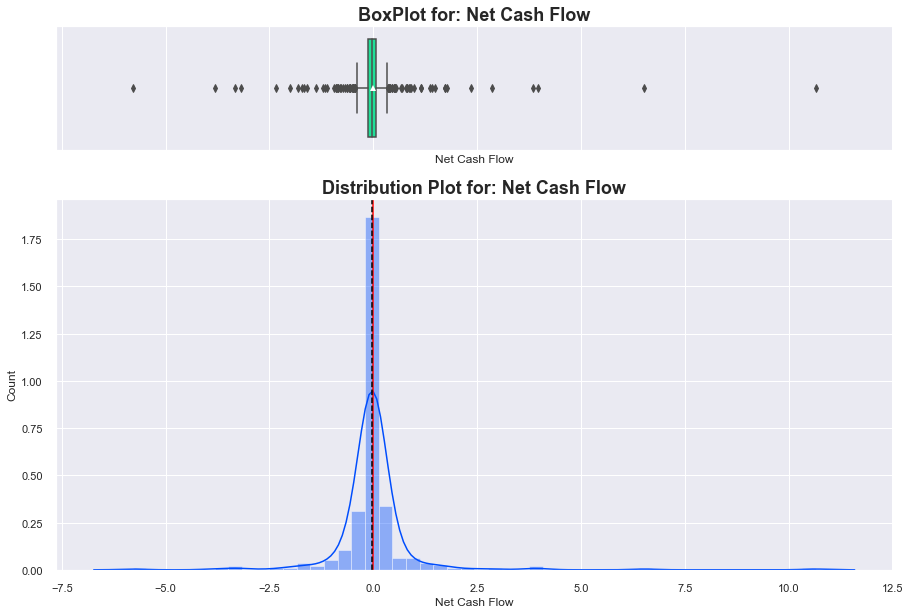

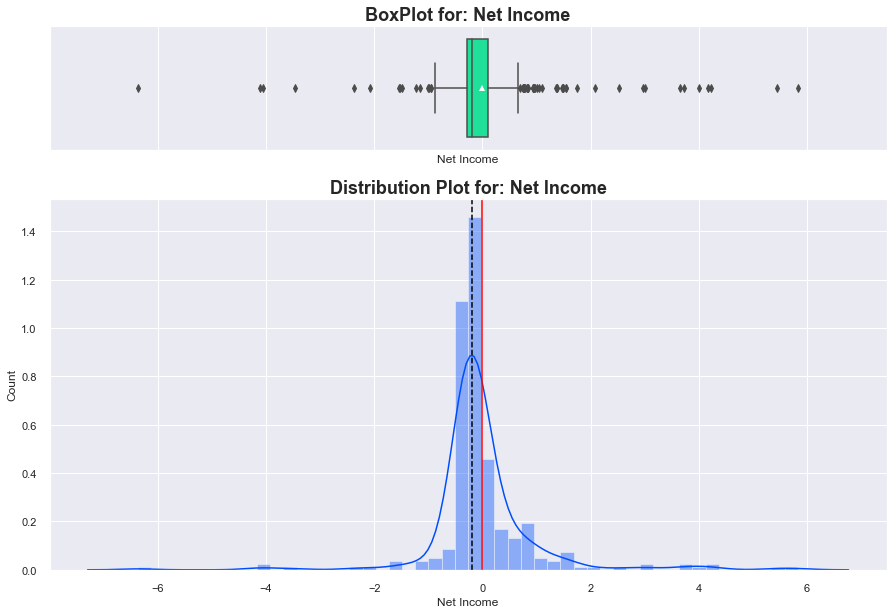

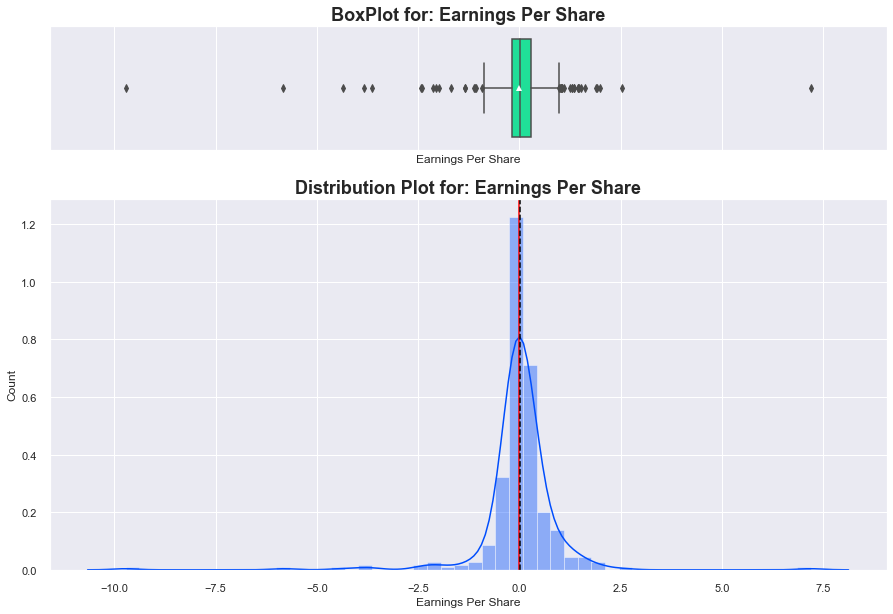

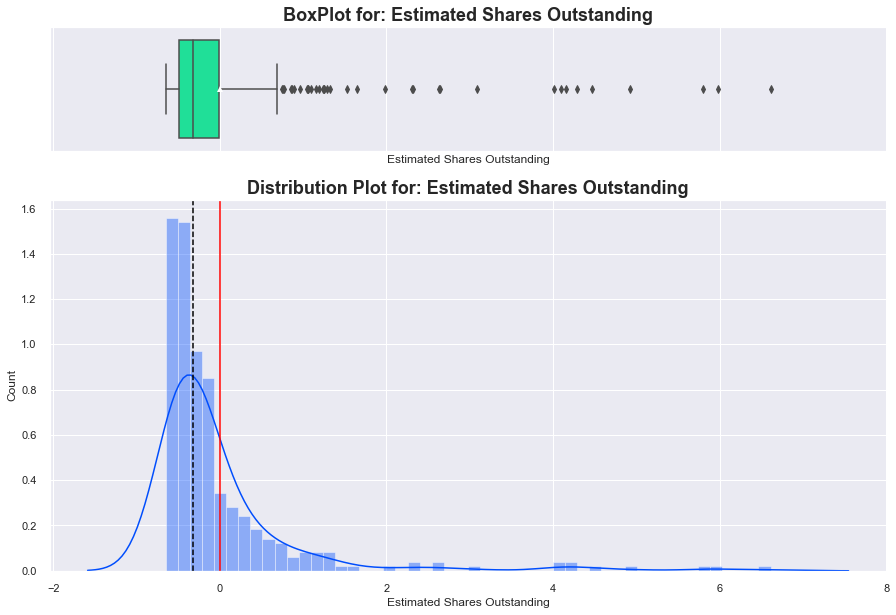

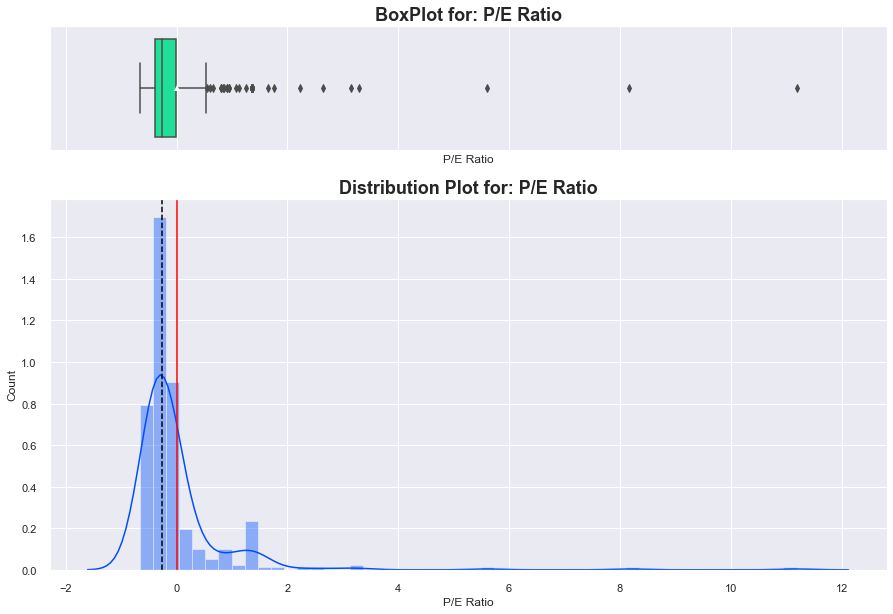

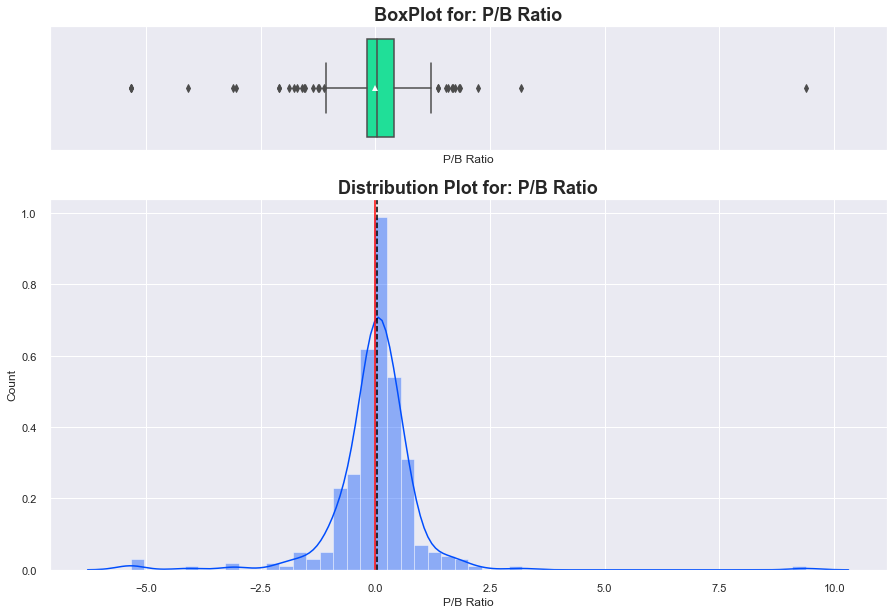

<IPython.core.display.Javascript object>

In [33]:
# Write a loop which will plot boxplot and histogram for all variables in subset scaled df
for col in numeric_columns:
    box_hist(subset_scaled_df[col], col)

#### Observations:

- We can see even if we have scaled our dataset, the distribution of each variable hasn't changed.

#### Let's also check the pairplot for the variables

<Figure size 1440x864 with 0 Axes>

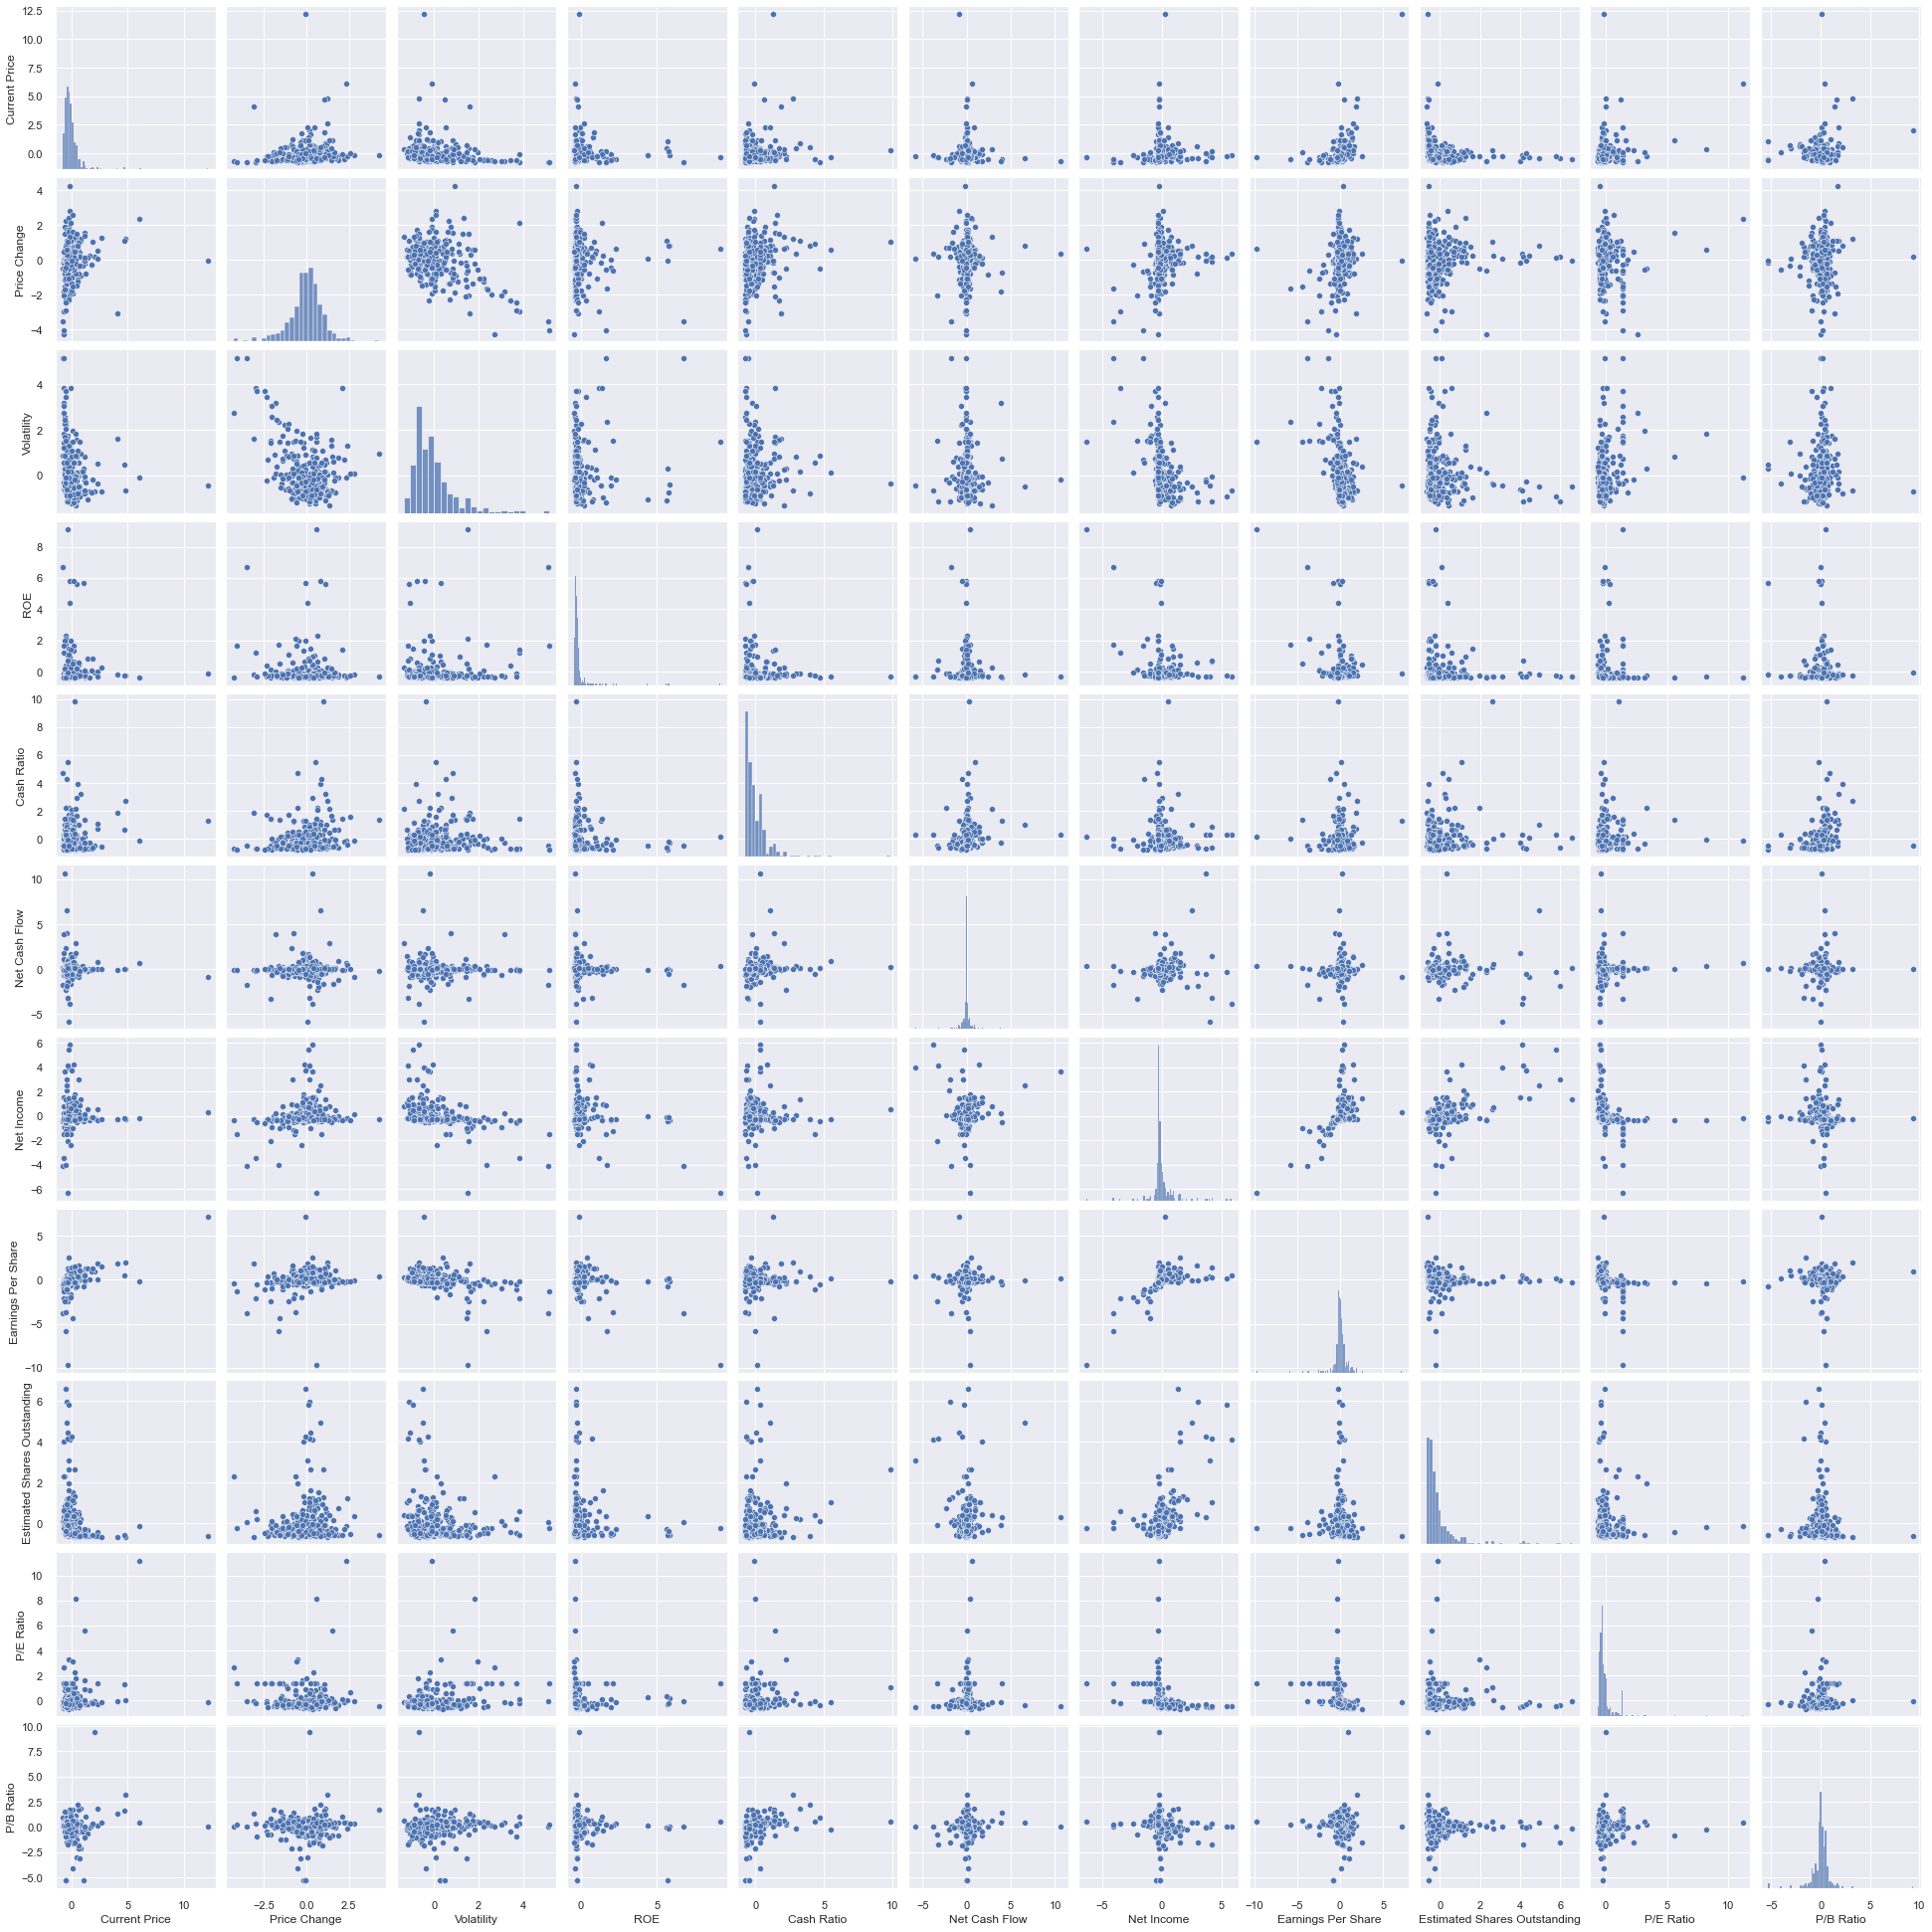

<IPython.core.display.Javascript object>

In [34]:
# plotiing pairplot for all the variables to observe any patterns with target variable
sns.set(style="ticks")
sns.set_style("darkgrid")
plt.figure(figsize=(20, 12))
sns.pairplot(subset_scaled_df)
plt.show()

#### Observations:

- We can also see that there is no change in the observations of pairplot from the non scaled dataset

#### Let's also check the corelation heatmap 

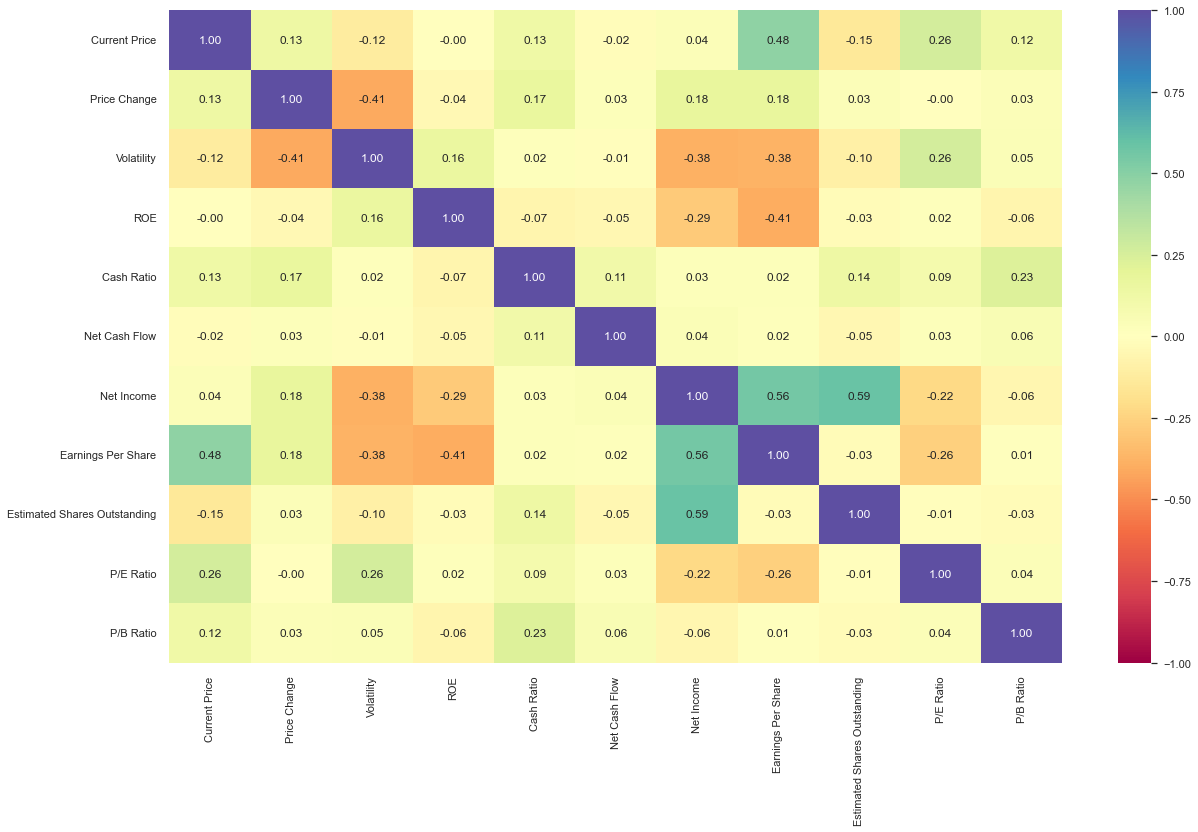

<IPython.core.display.Javascript object>

In [35]:
# plots heatmap for correlation matrix
plt.figure(figsize=(20, 12))
sns.heatmap(
    subset_scaled_df.corr(), annot=True, vmin=-1, vmax=1, cmap="Spectral", fmt=".2f"
)
plt.show()

#### Observations:

- We can see there are no changes in the correlation from the heat map after scaling

## Exploring K-means Clustering

#### Let's find out the optimal K value for K-means clustering

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2967023635156316
Number of Clusters: 4 	Average Distortion: 2.179645269703779
Number of Clusters: 5 	Average Distortion: 2.1283941117706435
Number of Clusters: 6 	Average Distortion: 2.0608145445053134
Number of Clusters: 7 	Average Distortion: 1.9847898674793327
Number of Clusters: 8 	Average Distortion: 1.9887592433275094


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

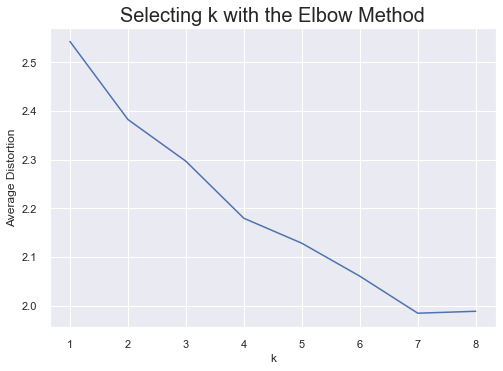

<IPython.core.display.Javascript object>

In [36]:
clusters = range(1, 9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

#### Observations:

- From the above graph we can see choosing the optimal k value is difficult, as the first elbow form was at 5 but then again we can see a drop after 6.
- If we will use the dataset where outliers are not removed, we may choose 5 as optimal value of k

#### Let's find the optimal value of K in the dataset with outliers removed

Number of Clusters: 1 	Average Distortion: 3.1482665386211908
Number of Clusters: 2 	Average Distortion: 2.9512720112654662
Number of Clusters: 3 	Average Distortion: 2.7587853682733137
Number of Clusters: 4 	Average Distortion: 2.632234476261218
Number of Clusters: 5 	Average Distortion: 2.53551645123123
Number of Clusters: 6 	Average Distortion: 2.4620633145362953
Number of Clusters: 7 	Average Distortion: 2.3915576127243
Number of Clusters: 8 	Average Distortion: 2.3279994516486044


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

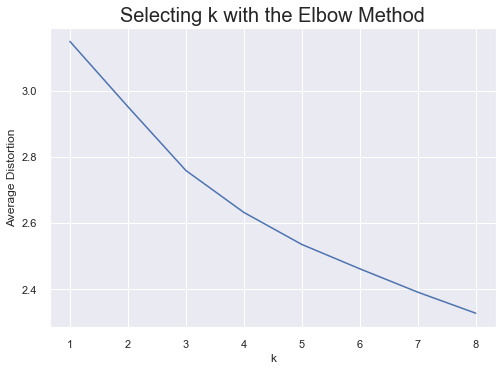

<IPython.core.display.Javascript object>

In [37]:
clusters = range(1, 9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df_outrm)
    prediction = model.predict(subset_scaled_df_outrm)
    distortion = (
        sum(
            np.min(
                cdist(subset_scaled_df_outrm, model.cluster_centers_, "euclidean"),
                axis=1,
            )
        )
        / subset_scaled_df_outrm.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

#### Observations:

- For the dataset with outliers removed optimal value for k seems to be 3 or 5.
- We will explore further with silhoutee score

#### Let's check Silhoutte score for both the original and outliers removed datasets

**For original dataset**

For n_clusters = 2, silhouette score is 0.4364805522329805
For n_clusters = 3, silhouette score is 0.45494915445064904
For n_clusters = 4, silhouette score is 0.4574398365861574
For n_clusters = 5, silhouette score is 0.4490668565313142
For n_clusters = 6, silhouette score is 0.38768555359623835
For n_clusters = 7, silhouette score is 0.13685994703111565
For n_clusters = 8, silhouette score is 0.3886929719130642
For n_clusters = 9, silhouette score is 0.30629190920677196


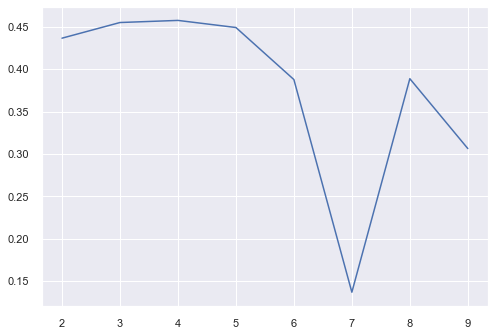

<IPython.core.display.Javascript object>

In [38]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

**For outliers removed dataset**

For n_clusters = 2, silhouette score is 0.1334867211279908
For n_clusters = 3, silhouette score is 0.18282709918315632
For n_clusters = 4, silhouette score is 0.16921992576864422
For n_clusters = 5, silhouette score is 0.15336308532333096
For n_clusters = 6, silhouette score is 0.13665094400431
For n_clusters = 7, silhouette score is 0.1265267327247148
For n_clusters = 8, silhouette score is 0.1237240596948121
For n_clusters = 9, silhouette score is 0.12332436930789177


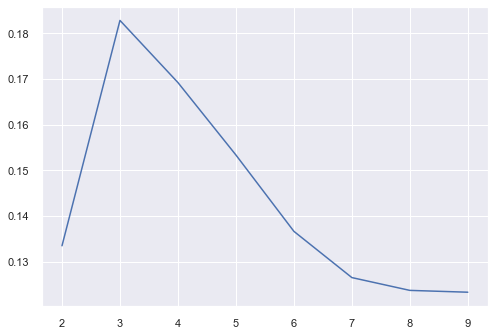

<IPython.core.display.Javascript object>

In [39]:
sil_score_outrm = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df_outrm))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df_outrm, preds)
    sil_score_outrm.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score_outrm)

#### Observations:

- From silhoutte score we can see original scaled dataset is performing better.
- Outliers removed dataset has low silhoutte score compared to original scaled dataset
- For original scaled dataset we can observe 5 or 7 could be good optimal value for K
- We will further visualize the silhoutte scores of original scaled dataset to finalize the value of K 

#### Visualizing Silhoutte score of original scaled dataset

**For K value 7**

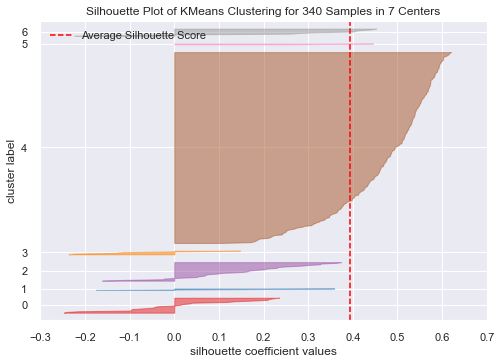

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [40]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(7, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

**For K value 6**

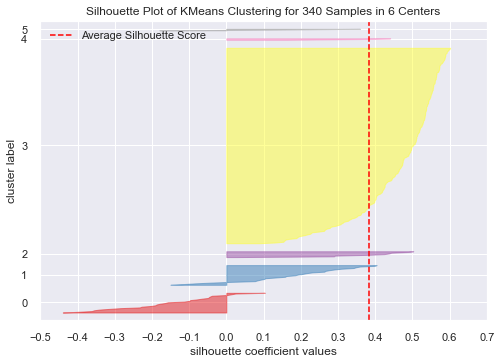

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [41]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

**For K value 5**

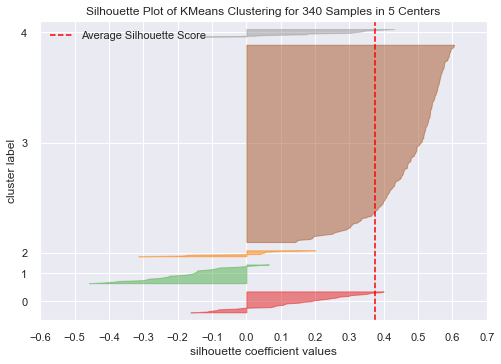

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [42]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

#### Observations:

- From the silhoutte score visualizer we can observe all values of K 5-7 has one cluster as majority, for K value 5 it's cluster label 3, for K vaue 6 it's cluster label 3 and for K value 7 it's cluster label 4
- For all K values there are silhoutee coefficient which for few clusters is in negative, among which we can see K value 6 has less number of clusters with silhoutte coefficient as negative
- Let's also visualize the silhoutte score for outliers removed dataset

#### Visualizing Silhoutte score for outliers removed dataset

**For K value 7**

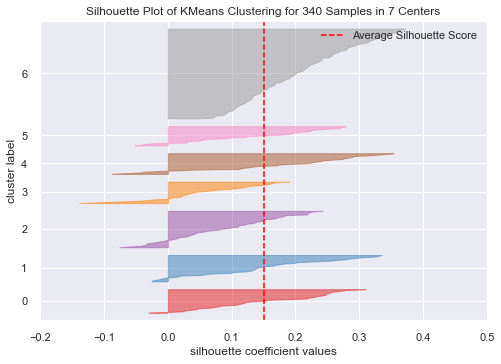

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [43]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(7, random_state=1))
visualizer.fit(subset_scaled_df_outrm)
visualizer.show()

**For K value 6**

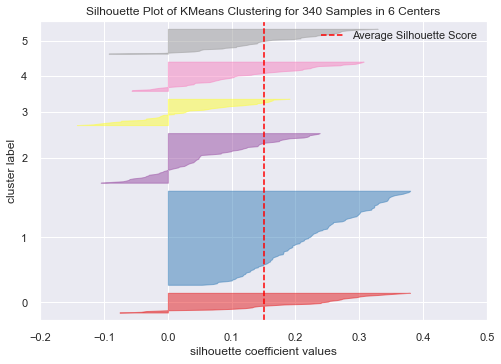

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [44]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(subset_scaled_df_outrm)
visualizer.show()

**For K value 5**

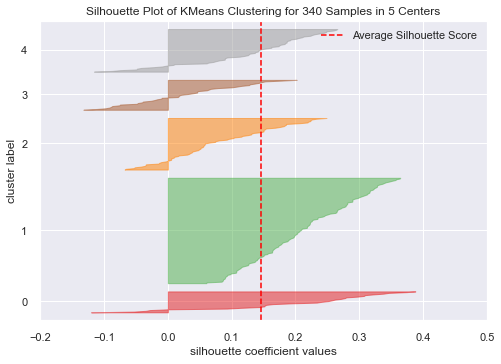

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [45]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(subset_scaled_df_outrm)
visualizer.show()

#### Observations:

- From all the above silhoute score visualization on outliers removed dataset, we can observe it's performing better than original scaled dataset
- For K value 5 the balance of clusters looks good and have minimum number of clusters with silhoutte coefficient in negative

**From all above exploration we can finalize K means is performing better with optimal value of K as 5 on the outliers removed scaled dataset**

**Fitting K means on outliers removed dataset with K as 5**

In [46]:
kmeans = KMeans(n_clusters=5, random_state=1)
kmeans.fit(subset_scaled_df_outrm)

KMeans(n_clusters=5, random_state=1)

<IPython.core.display.Javascript object>

**Adding cluster labels to original dataset**

In [47]:
# adding kmeans cluster labels to the original dataframe
df["K_means_segments"] = kmeans.labels_

<IPython.core.display.Javascript object>

**Creating cluster profile with K means clusters**

In [48]:
cluster_profile = df.groupby("K_means_segments").mean()

<IPython.core.display.Javascript object>

In [49]:
cluster_profile

Current Price  Price Change  Volatility       ROE  \
K_means_segments                                                      
0                      32.27099     -14.80780     2.79764 100.72414   
1                      47.87302       4.15488     1.42763  19.26056   
2                     148.93186       5.98251     1.31276  59.38571   
3                     128.59447      10.73742     1.74646  25.14634   
4                      70.03047       6.32774     1.23239  45.15517   

                  Cash Ratio    Net Cash Flow        Net Income  \
K_means_segments                                                  
0                   41.03448 -204367103.44828 -3607376896.55172   
1                   46.37324 -147858471.83099   828981295.77465   
2                   40.12857   13453271.42857   988639814.28571   
3                  227.29268  488585634.14634   685962536.58537   
4                   67.32759  428131034.48276  6856208620.68966   

                  Earnings Per Share  Estimated Shares Outstanding  P/E Ratio  \
K_means_segments                                                                
0                           -8.82276               581351388.28414   75.06039   
1                            2.48842               347116490.60754   20.61038   
2                            6.01771               186987714.98943   30.76531   
3                            2.66561               579175982.42683   70.47230   
4                            5.44897              1606974958.29483   16.23983   

                  P/B Ratio  
K_means_segments             
0                   1.01897  
1                  -1.77668  
2                  -7.61926  
3                   7.72282  
4                  -2.49576

<IPython.core.display.Javascript object>

**Adding counts for each segment**

In [50]:
cluster_profile["count_in_each_segment"] = (
    df.groupby("K_means_segments")["Current Price"].count().values
)

<IPython.core.display.Javascript object>

#### Display cluster profiles

In [51]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

<IPython.core.display.Javascript object>

#### Visualizing the clusters

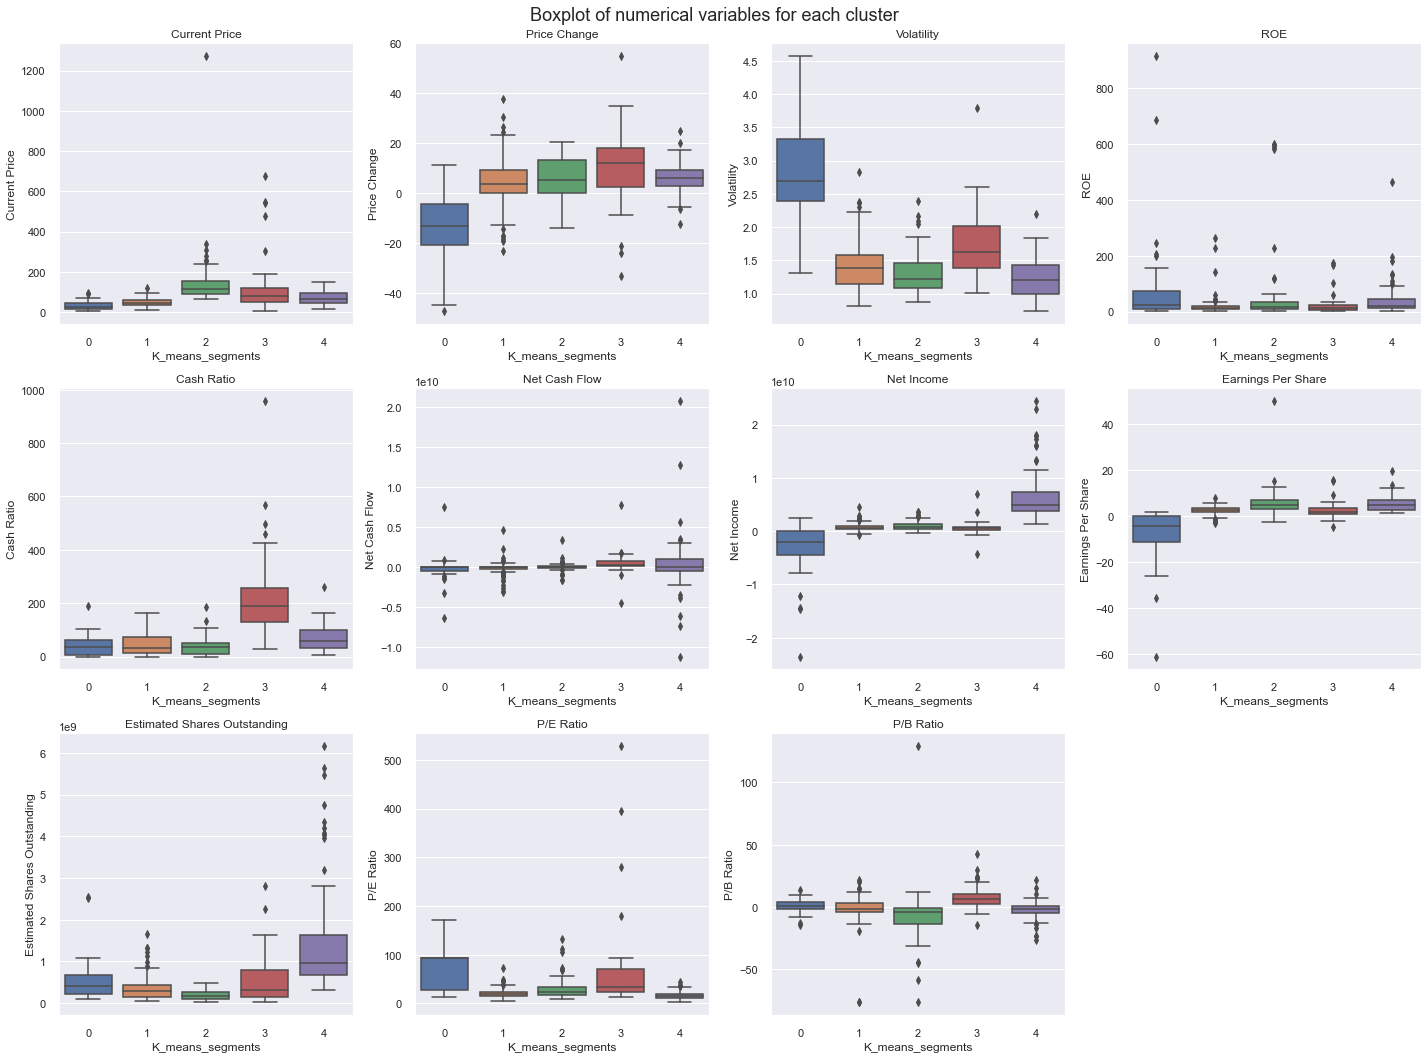

<IPython.core.display.Javascript object>

In [52]:
# Plotting subplots for all numerical columns for each cluster labels
plt.figure(figsize=(20, 15))

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y=df[variable], x=df["K_means_segments"])
    plt.tight_layout()
    plt.title(variable)
    plt.suptitle("Boxplot of numerical variables for each cluster", fontsize=18)

plt.show()

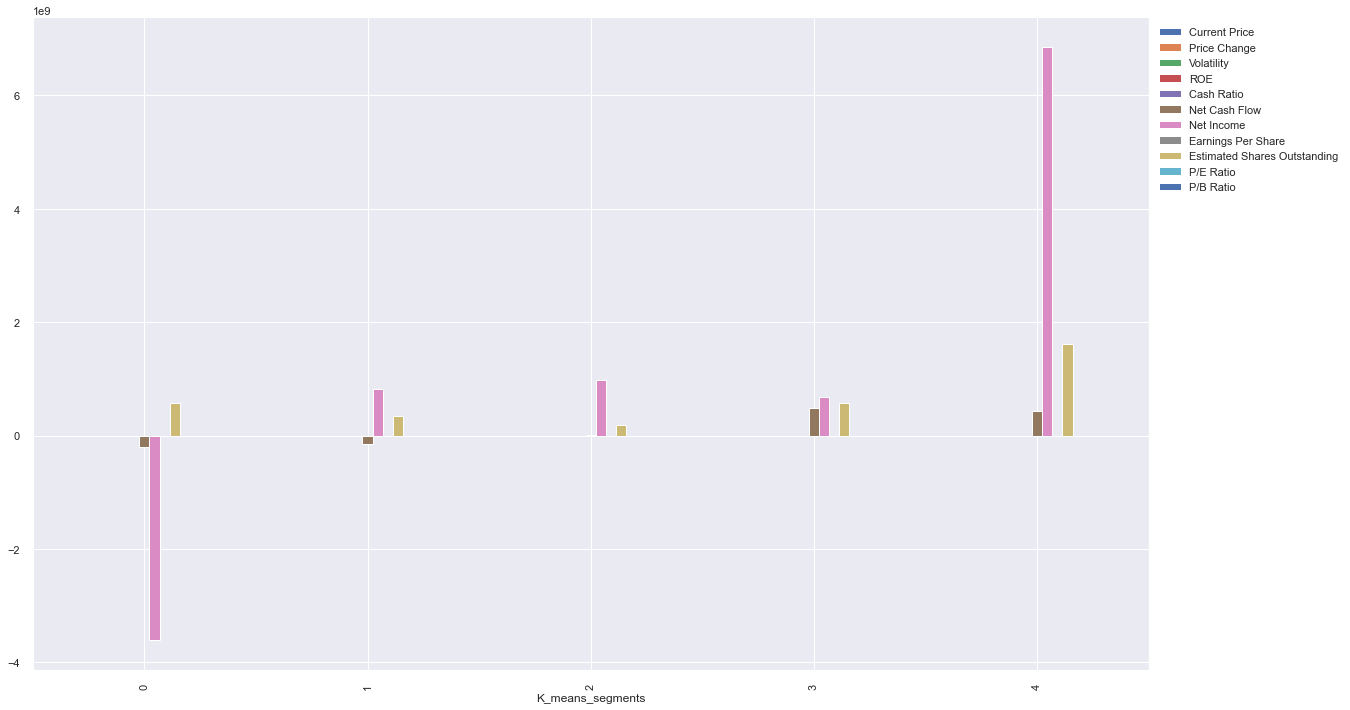

<IPython.core.display.Javascript object>

In [53]:
df.groupby("K_means_segments").mean().plot.bar(figsize=(20, 12))
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

#### Plotting with the scaled data which will help us visualize better

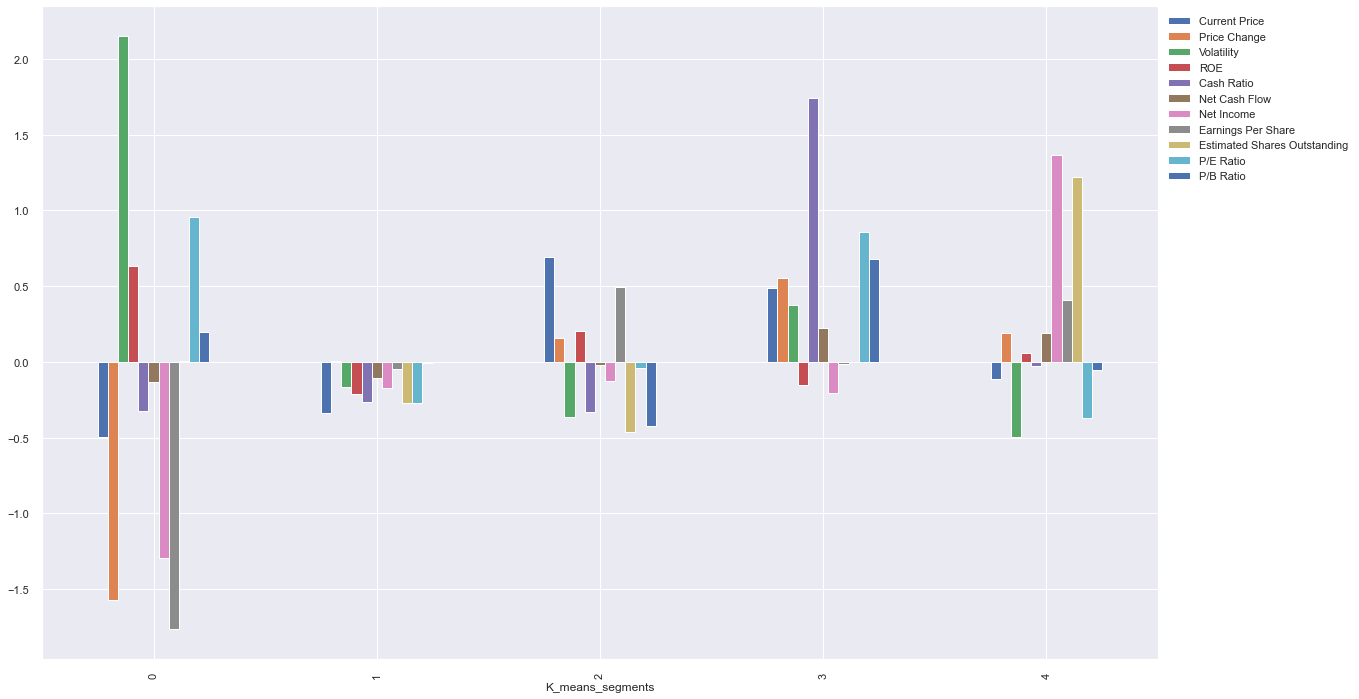

<IPython.core.display.Javascript object>

In [54]:
subset_scaled_df_plt = subset_scaled_df.copy()
subset_scaled_df_plt["K_means_segments"] = kmeans.labels_
subset_scaled_df_plt.groupby("K_means_segments").mean().plot.bar(figsize=(20, 12))
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

### Cluster Profiling - Insights of clusters obtained from K means

- **Cluster 0**:
    - Current price is on the lower range
    - Average price change is on the higher side
    - Volatility is highest
    - ROE is highest
    - Cash Ratio is average
    - Net cash flow is decent and on average similar to other clusters
    - Net income is lowest among all clusters and on average in negative
    - Earning per share is on the lower side
    - Estimated shares outstanding is low
    - P/E ratio is on the higher side, while P/B ratio is average and comparable to other clusters


- **Cluster 1**:
    - Current price is on the lower range
    - Average price change is very low in this cluster
    - Volatility is low in this cluster
    - ROE is on lower range and comparable to cluster 2, 3 and 4
    - Cash Ratio is average and on the lower side
    - Net cash flow is decent and on average similar to other clusters
    - Net income is low in this cluster
    - Earning per share is on the lower side but on the positive side
    - Estimated shares outstanding is low
    - P/E ratio is on the lower side in this cluster, and P/B ratio is also low but comparable to other clusters 


- **Cluster 2**:
    - Current price is highest in this cluster among all other clusters
    - Average price change is low in this cluster however it's more than Cluster 0
    - Volatility is very low in this cluster
    - ROE is on lower range and comparable to cluster 1, 3 and 4
    - Cash Ratio is on the lower side and lowest among all
    - Net cash flow is decent and on average similar to other clusters
    - Net income is low in this cluster and close to cluster 1
    - Earning per share is higher than any other clusters
    - Estimated shares outstanding is the lowest among all clusters
    - P/E ratio is on the lower side in this cluster but higher than cluster 1 and 4, and P/B ratio is the lowest among all clusters
    
    
- **Cluster 3**:
    - Current price is in mid level, higher than cluster 0 and 1, lower than cluster 2
    - Average price change in this cluster is highest among all other clusters
    - Volatility is higher than all other cluster except cluster 0
    - ROE is on lower range and comparable to cluster 1, 2 and 4
    - Cash Ratio is highest among all other clusters
    - Net cash flow is decent and on average similar to other clusters
    - Average Net income is positive and comparable to Cluster 1 and 2
    - Earning per share is lowest except cluster 0 which has average earning per share in negative
    - Estimated shares outstanding is higher than cluster 1 and 2, and almost similar to cluster 0, but it's lower than cluster 4
    - P/E ratio and P/B ratio are higher than other clusters
    

- **Cluster 4**:
    - Current price is on the lower side, lower than cluster 2 and 3, ut slightly higher than 0 and 1
    - Average price change in this cluster is almost similar to cluster 1 and 2 but lower than cluster 3, and higher than cluster 0
    - Volatility is lowest in this cluster than all other clusters
    - ROE is on lower range and comparable to cluster 1, 2 and 3
    - Cash Ratio is lower than cluster 3 but higher than any other clusters
    - Net cash flow is decent and on average similar to other clusters
    - Average Net income is highest among all other clusters
    - Earning per share is higher than cluster 1 and 3 and lower than cluster 2
    - Estimated shares outstanding is highest among all other clusters
    - P/E ratio and P/B ratio are lower than other clusters

## Hierarchical Clustering

#### Let's first explore which kind of distance and linkage metrics performing well on our scaled dataset

- Note: will explore only with original scaled dataset since K-means gave better results on the same.

In [55]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9259195530524591.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850002.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159737.
Cophenetic correl

<IPython.core.display.Javascript object>

In [56]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with Euclidean distance and average linkage.


<IPython.core.display.Javascript object>

#### Observations:

- we can see Euclidean distance and average linkage is giving the highest cophenetic correlation. 
- We will further explore different linkage methods with Euclidean distance.

#### Let's explore different linkage methods with Euclidean distance

In [57]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.


<IPython.core.display.Javascript object>

In [58]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


<IPython.core.display.Javascript object>

#### Observations:

- We can see the best distance and linkage method is still same, Euclidean and Average which is giving the highest cophenetic correlation

#### Let's plot the dendogram of different linkage methods

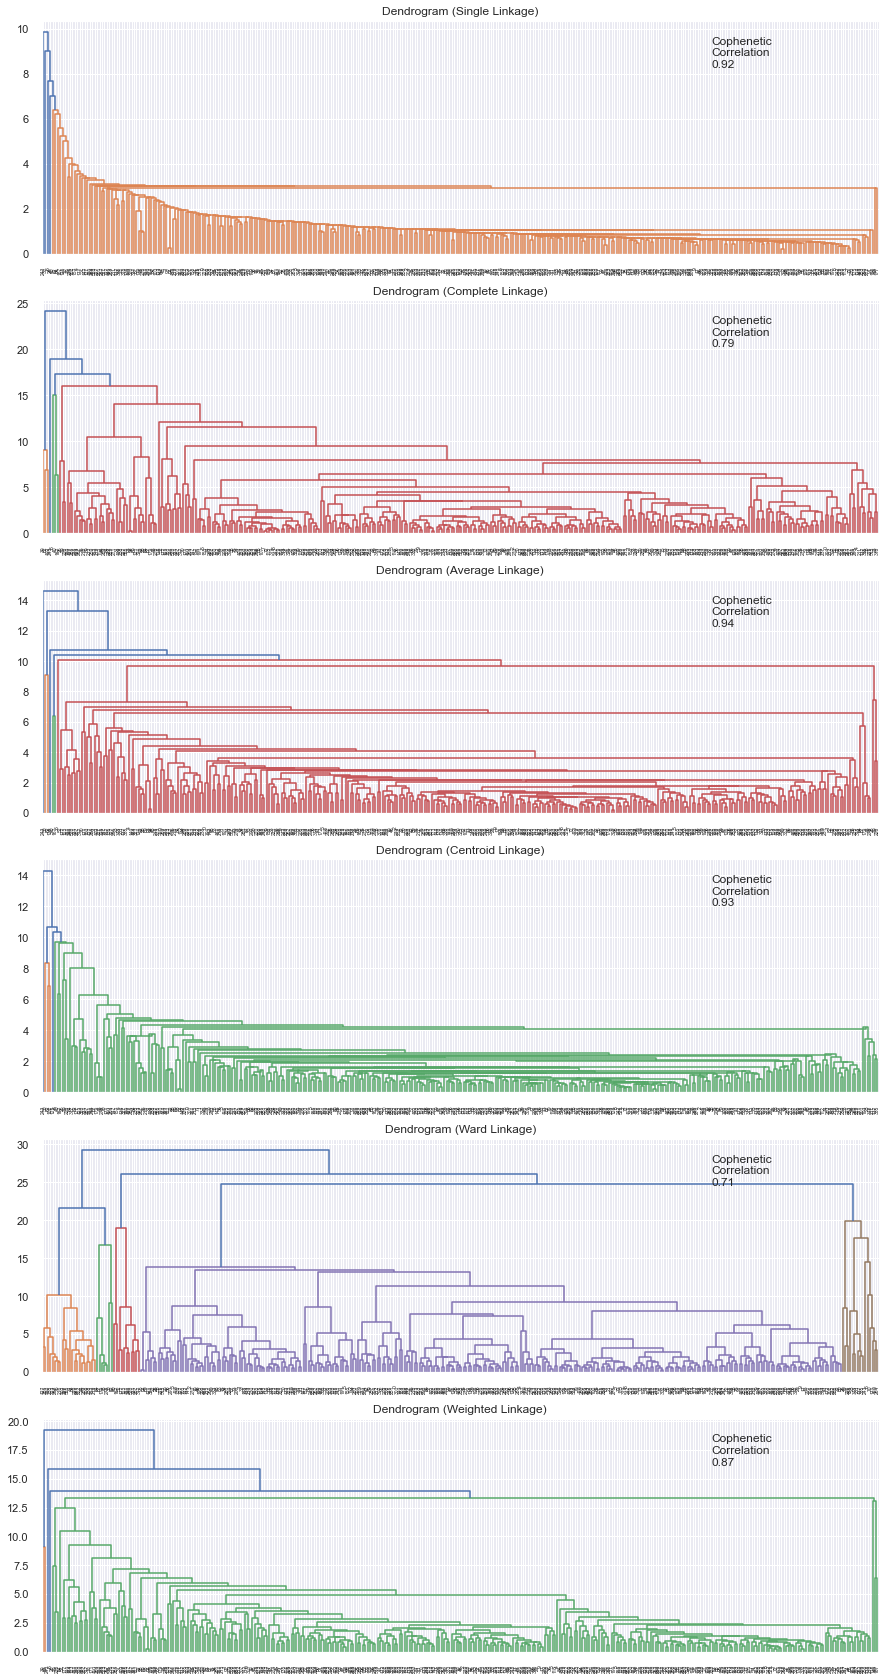

<IPython.core.display.Javascript object>

In [59]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

#### Observations:

- Highest cophenetic correlation is with Eucledian and Average linkage, we can see from the dendogram as well.
- Except ward linkage all othet linkage methods created dendograms which are clustered to one side, left.
- We will move forward with Average linkage and Euclidean distance.
- 5 appears to be the appropriate number of cluster from Ward linkage which has the best spread dendogram

#### Let's apply the Agglomerative clustering 

In [60]:
# applying agglomerative clustering on original scaled df
HCmodel = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="average")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(linkage='average', n_clusters=5)

<IPython.core.display.Javascript object>

In [61]:
# Coping the dataset to a new dataset for keeing the cluster labels separate for hierarchical clustering
dfhc = df.copy()
dfhc = dfhc.drop(["K_means_segments"], axis=1)
dfhc

Ticker Symbol                 Security             GICS Sector  \
0             AAL  American Airlines Group             Industrials   
1            ABBV                   AbbVie             Health Care   
2             ABT      Abbott Laboratories             Health Care   
3            ADBE        Adobe Systems Inc  Information Technology   
4             ADI     Analog Devices, Inc.  Information Technology   
..            ...                      ...                     ...   
335          YHOO               Yahoo Inc.  Information Technology   
336           YUM          Yum! Brands Inc  Consumer Discretionary   
337           ZBH   Zimmer Biomet Holdings             Health Care   
338          ZION            Zions Bancorp              Financials   
339           ZTS                   Zoetis             Health Care   

                GICS Sub Industry  Current Price  Price Change  Volatility  \
0                        Airlines       42.35000       9.99999     1.68715   
1                 Pharmaceuticals       59.24000       8.33943     2.19789   
2           Health Care Equipment       44.91000      11.30112     1.27365   
3            Application Software       93.94000      13.97720     1.35768   
4                  Semiconductors       55.32000      -1.82786     1.70117   
..                            ...            ...           ...         ...   
335  Internet Software & Services       33.26000      14.88773     1.84515   
336                   Restaurants       52.51618      -8.69892     1.47888   
337         Health Care Equipment      102.59000       9.34768     1.40421   
338                Regional Banks       27.30000      -1.15859     1.46818   
339               Pharmaceuticals       47.92000      16.67884     1.61028   

     ROE  Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
0    135          51     -604000000  7610000000            11.39000   
1    130          77       51000000  5144000000             3.15000   
2     21          67      938000000  4423000000             2.94000   
3      9         180     -240840000   629551000             1.26000   
4     14         272      315120000   696878000             0.31000   
..   ...         ...            ...         ...                 ...   
335   15         459    -1032187000 -4359082000            -4.64000   
336  142          27      159000000  1293000000             2.97000   
337    1         100      376000000   147000000             0.78000   
338    4          99      -43623000   309471000             1.20000   
339   32          65      272000000   339000000             0.68000   

     Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
0                 668129938.50000    3.71817   -8.78422  
1                1633015873.00000   18.80635   -8.75007  
2                1504421769.00000   15.27551   -0.39417  
3                 499643650.80000   74.55556    4.19965  
4                2247993548.00000  178.45161    1.05981  
..                            ...        ...        ...  
335               939457327.60000   28.97619    6.26177  
336               435353535.40000   17.68221   -3.83826  
337               188461538.50000  131.52564  -23.88445  
338               257892500.00000   22.75000   -0.06310  
339               498529411.80000   70.47059    1.72307  

[340 rows x 15 columns]

<IPython.core.display.Javascript object>

#### Adding the clunster labels to the dataset

In [62]:
dfhc["HC_Clusters"] = HCmodel.labels_
dfhc

Ticker Symbol                 Security             GICS Sector  \
0             AAL  American Airlines Group             Industrials   
1            ABBV                   AbbVie             Health Care   
2             ABT      Abbott Laboratories             Health Care   
3            ADBE        Adobe Systems Inc  Information Technology   
4             ADI     Analog Devices, Inc.  Information Technology   
..            ...                      ...                     ...   
335          YHOO               Yahoo Inc.  Information Technology   
336           YUM          Yum! Brands Inc  Consumer Discretionary   
337           ZBH   Zimmer Biomet Holdings             Health Care   
338          ZION            Zions Bancorp              Financials   
339           ZTS                   Zoetis             Health Care   

                GICS Sub Industry  Current Price  Price Change  Volatility  \
0                        Airlines       42.35000       9.99999     1.68715   
1                 Pharmaceuticals       59.24000       8.33943     2.19789   
2           Health Care Equipment       44.91000      11.30112     1.27365   
3            Application Software       93.94000      13.97720     1.35768   
4                  Semiconductors       55.32000      -1.82786     1.70117   
..                            ...            ...           ...         ...   
335  Internet Software & Services       33.26000      14.88773     1.84515   
336                   Restaurants       52.51618      -8.69892     1.47888   
337         Health Care Equipment      102.59000       9.34768     1.40421   
338                Regional Banks       27.30000      -1.15859     1.46818   
339               Pharmaceuticals       47.92000      16.67884     1.61028   

     ROE  Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
0    135          51     -604000000  7610000000            11.39000   
1    130          77       51000000  5144000000             3.15000   
2     21          67      938000000  4423000000             2.94000   
3      9         180     -240840000   629551000             1.26000   
4     14         272      315120000   696878000             0.31000   
..   ...         ...            ...         ...                 ...   
335   15         459    -1032187000 -4359082000            -4.64000   
336  142          27      159000000  1293000000             2.97000   
337    1         100      376000000   147000000             0.78000   
338    4          99      -43623000   309471000             1.20000   
339   32          65      272000000   339000000             0.68000   

     Estimated Shares Outstanding  P/E Ratio  P/B Ratio  HC_Clusters  
0                 668129938.50000    3.71817   -8.78422            0  
1                1633015873.00000   18.80635   -8.75007            0  
2                1504421769.00000   15.27551   -0.39417            0  
3                 499643650.80000   74.55556    4.19965            0  
4                2247993548.00000  178.45161    1.05981            0  
..                            ...        ...        ...          ...  
335               939457327.60000   28.97619    6.26177            0  
336               435353535.40000   17.68221   -3.83826            0  
337               188461538.50000  131.52564  -23.88445            0  
338               257892500.00000   22.75000   -0.06310            0  
339               498529411.80000   70.47059    1.72307            0  

[340 rows x 16 columns]

<IPython.core.display.Javascript object>

#### Cluster Profiling

In [63]:
cluster_profile_hc = dfhc.groupby("HC_Clusters").mean()

<IPython.core.display.Javascript object>

In [64]:
cluster_profile_hc["count_in_each_segments"] = (
    dfhc.groupby("HC_Clusters")["Current Price"].count().values
)

<IPython.core.display.Javascript object>

In [65]:
# let's see the names of the ticker symbols in each cluster
for cl in dfhc["HC_Clusters"].unique():
    print(
        "The",
        dfhc[dfhc["HC_Clusters"] == cl]["Ticker Symbol"].nunique(),
        "Tickers in cluster",
        cl,
        "are:",
    )
    print(dfhc[dfhc["HC_Clusters"] == cl]["Ticker Symbol"].unique())
    print("-" * 100, "\n")

The 334 Tickers in cluster 0 are:
['AAL' 'ABBV' 'ABT' 'ADBE' 'ADI' 'ADM' 'ADS' 'AEE' 'AEP' 'AFL' 'AIG' 'AIV'
 'AIZ' 'AJG' 'AKAM' 'ALB' 'ALK' 'ALL' 'ALLE' 'ALXN' 'AMAT' 'AME' 'AMG'
 'AMGN' 'AMP' 'AMT' 'AMZN' 'AN' 'ANTM' 'AON' 'APC' 'APH' 'ARNC' 'ATVI'
 'AVB' 'AVGO' 'AWK' 'AXP' 'BA' 'BAX' 'BBT' 'BCR' 'BHI' 'BIIB' 'BK' 'BLL'
 'BMY' 'BSX' 'BWA' 'BXP' 'C' 'CAT' 'CB' 'CBG' 'CCI' 'CCL' 'CELG' 'CF'
 'CFG' 'CHD' 'CHRW' 'CHTR' 'CI' 'CINF' 'CL' 'CMA' 'CME' 'CMG' 'CMI' 'CMS'
 'CNC' 'CNP' 'COF' 'COG' 'COO' 'CSX' 'CTL' 'CTSH' 'CTXS' 'CVS' 'CVX' 'CXO'
 'D' 'DAL' 'DD' 'DE' 'DFS' 'DGX' 'DHR' 'DIS' 'DISCA' 'DISCK' 'DLPH' 'DLR'
 'DNB' 'DOV' 'DPS' 'DUK' 'DVA' 'DVN' 'EBAY' 'ECL' 'ED' 'EFX' 'EIX' 'EMN'
 'EOG' 'EQIX' 'EQR' 'EQT' 'ES' 'ESS' 'ETFC' 'ETN' 'ETR' 'EW' 'EXC' 'EXPD'
 'EXPE' 'EXR' 'F' 'FAST' 'FBHS' 'FCX' 'FE' 'FIS' 'FISV' 'FLIR' 'FLR' 'FLS'
 'FMC' 'FRT' 'FSLR' 'FTR' 'GD' 'GGP' 'GILD' 'GLW' 'GM' 'GPC' 'GRMN' 'GT'
 'GWW' 'HAL' 'HAS' 'HBAN' 'HCA' 'HCN' 'HCP' 'HES' 'HIG' 'HOG' 'HON' 'HPE'
 'HPQ' 'HRL' '

<IPython.core.display.Javascript object>

#### Observations:

- We can observe that Cluster 2, 1, 3 have 2 tickers and Cluster 4 has 1 ticker while all rest of tickers are in cluster 0
- Let's explore 'wards' linkage method and see if that gives us a better result, as we have seen the dendogram ws well spread for ward method

#### Exploring 'Ward' linkage method

In [66]:
HCmodel1 = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="ward")
HCmodel1.fit(subset_scaled_df)

AgglomerativeClustering(n_clusters=5)

<IPython.core.display.Javascript object>

In [67]:
dfhc["HC_Clusters"] = HCmodel1.labels_
dfhc

Ticker Symbol                 Security             GICS Sector  \
0             AAL  American Airlines Group             Industrials   
1            ABBV                   AbbVie             Health Care   
2             ABT      Abbott Laboratories             Health Care   
3            ADBE        Adobe Systems Inc  Information Technology   
4             ADI     Analog Devices, Inc.  Information Technology   
..            ...                      ...                     ...   
335          YHOO               Yahoo Inc.  Information Technology   
336           YUM          Yum! Brands Inc  Consumer Discretionary   
337           ZBH   Zimmer Biomet Holdings             Health Care   
338          ZION            Zions Bancorp              Financials   
339           ZTS                   Zoetis             Health Care   

                GICS Sub Industry  Current Price  Price Change  Volatility  \
0                        Airlines       42.35000       9.99999     1.68715   
1                 Pharmaceuticals       59.24000       8.33943     2.19789   
2           Health Care Equipment       44.91000      11.30112     1.27365   
3            Application Software       93.94000      13.97720     1.35768   
4                  Semiconductors       55.32000      -1.82786     1.70117   
..                            ...            ...           ...         ...   
335  Internet Software & Services       33.26000      14.88773     1.84515   
336                   Restaurants       52.51618      -8.69892     1.47888   
337         Health Care Equipment      102.59000       9.34768     1.40421   
338                Regional Banks       27.30000      -1.15859     1.46818   
339               Pharmaceuticals       47.92000      16.67884     1.61028   

     ROE  Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
0    135          51     -604000000  7610000000            11.39000   
1    130          77       51000000  5144000000             3.15000   
2     21          67      938000000  4423000000             2.94000   
3      9         180     -240840000   629551000             1.26000   
4     14         272      315120000   696878000             0.31000   
..   ...         ...            ...         ...                 ...   
335   15         459    -1032187000 -4359082000            -4.64000   
336  142          27      159000000  1293000000             2.97000   
337    1         100      376000000   147000000             0.78000   
338    4          99      -43623000   309471000             1.20000   
339   32          65      272000000   339000000             0.68000   

     Estimated Shares Outstanding  P/E Ratio  P/B Ratio  HC_Clusters  
0                 668129938.50000    3.71817   -8.78422            3  
1                1633015873.00000   18.80635   -8.75007            3  
2                1504421769.00000   15.27551   -0.39417            3  
3                 499643650.80000   74.55556    4.19965            3  
4                2247993548.00000  178.45161    1.05981            3  
..                            ...        ...        ...          ...  
335               939457327.60000   28.97619    6.26177            0  
336               435353535.40000   17.68221   -3.83826            3  
337               188461538.50000  131.52564  -23.88445            3  
338               257892500.00000   22.75000   -0.06310            3  
339               498529411.80000   70.47059    1.72307            3  

[340 rows x 16 columns]

<IPython.core.display.Javascript object>

In [68]:
cluster_profile_hc = dfhc.groupby("HC_Clusters").mean()

<IPython.core.display.Javascript object>

In [69]:
cluster_profile_hc["count_in_each_segments"] = (
    dfhc.groupby("HC_Clusters")["Current Price"].count().values
)

<IPython.core.display.Javascript object>

In [70]:
cluster_profile_hc

Current Price  Price Change  Volatility       ROE  Cash Ratio  \
HC_Clusters                                                                  
0                326.19822      10.56324     1.64256  14.40000   309.46667   
1                 84.35572       3.85498     1.82767 633.57143    33.57143   
2                 42.84818       6.27045     1.12355  22.72727    71.45455   
3                 72.76040       5.21331     1.42708  25.60351    60.39298   
4                 36.44046     -16.07341     2.83288  57.50000    42.40909   

               Net Cash Flow        Net Income  Earnings Per Share  \
HC_Clusters                                                          
0            288850666.66667   864498533.33333             7.78533   
1           -568400000.00000 -4968157142.85714           -10.84143   
2            558636363.63636 14631272727.27273             3.41000   
3             79951512.28070  1538594322.80702             3.65535   
4           -472834090.90909 -3161045227.27273            -8.00500   

             Estimated Shares Outstanding  P/E Ratio  P/B Ratio  \
HC_Clusters                                                       
0                         544900261.30133  113.09533   19.14215   
1                         398169036.44286   42.28454  -11.58950   
2                        4242572567.29091   15.24217   -4.92462   
3                         446472132.22846   24.72267   -2.64719   
4                         514367806.20182   85.55568    0.83684   

             count_in_each_segments  
HC_Clusters                          
0                                15  
1                                 7  
2                                11  
3                               285  
4                                22

<IPython.core.display.Javascript object>

In [71]:
# let's see the names of the ticker symbols in each cluster
for cl in dfhc["HC_Clusters"].unique():
    print(
        "The",
        dfhc[dfhc["HC_Clusters"] == cl]["Ticker Symbol"].nunique(),
        "Tickers in cluster",
        cl,
        "are:",
    )
    print(dfhc[dfhc["HC_Clusters"] == cl]["Ticker Symbol"].unique())
    print("-" * 100, "\n")

The 285 Tickers in cluster 3 are:
['AAL' 'ABBV' 'ABT' 'ADBE' 'ADI' 'ADM' 'AEE' 'AEP' 'AFL' 'AIG' 'AIV' 'AIZ'
 'AJG' 'AKAM' 'ALB' 'ALK' 'ALL' 'AMAT' 'AME' 'AMG' 'AMP' 'AMT' 'AN' 'ANTM'
 'AON' 'APH' 'ARNC' 'ATVI' 'AVB' 'AVGO' 'AWK' 'AXP' 'BA' 'BAX' 'BBT' 'BCR'
 'BIIB' 'BK' 'BLL' 'BMY' 'BSX' 'BWA' 'BXP' 'CAT' 'CB' 'CBG' 'CCI' 'CCL'
 'CELG' 'CF' 'CFG' 'CHD' 'CHRW' 'CI' 'CINF' 'CMA' 'CME' 'CMI' 'CMS' 'CNC'
 'CNP' 'COF' 'COO' 'CSX' 'CTL' 'CTSH' 'CTXS' 'CVS' 'CVX' 'D' 'DAL' 'DD'
 'DE' 'DFS' 'DGX' 'DHR' 'DIS' 'DISCA' 'DISCK' 'DLPH' 'DLR' 'DNB' 'DOV'
 'DPS' 'DUK' 'DVA' 'EBAY' 'ECL' 'ED' 'EFX' 'EIX' 'EMN' 'EQR' 'EQT' 'ES'
 'ESS' 'ETFC' 'ETN' 'ETR' 'EW' 'EXC' 'EXPD' 'EXPE' 'EXR' 'FAST' 'FBHS'
 'FE' 'FIS' 'FISV' 'FLIR' 'FLR' 'FLS' 'FMC' 'FRT' 'FSLR' 'GD' 'GGP' 'GILD'
 'GLW' 'GM' 'GPC' 'GRMN' 'GT' 'GWW' 'HAL' 'HAS' 'HBAN' 'HCA' 'HCN' 'HCP'
 'HIG' 'HOG' 'HON' 'HPE' 'HPQ' 'HRL' 'HSIC' 'HST' 'HSY' 'HUM' 'IBM' 'IDXX'
 'IFF' 'IP' 'IPG' 'IRM' 'ITW' 'IVZ' 'JBHT' 'JEC' 'JNPR' 'KIM' 'KSU' 'LEG'
 'LEN' 'LH' 

<IPython.core.display.Javascript object>

#### Observations:

- Even though ward linkage method had less cophenetic correlation it's still performing better than average linkage method.
- Using ward linkage we can observe cluster 3 has 285 tickers, cluster 0 has 15, cluster 1 has 7, cluster 4 has 22, cluste 2 has 11, which looks it has variability
- So we will consider this as clustering profile for hierarchical clustering.

#### Display Cluster profile

In [72]:
# lets display cluster profile
cluster_profile_hc.style.highlight_max(color="lightgreen", axis=0)

<IPython.core.display.Javascript object>

#### Visualizing the clusters

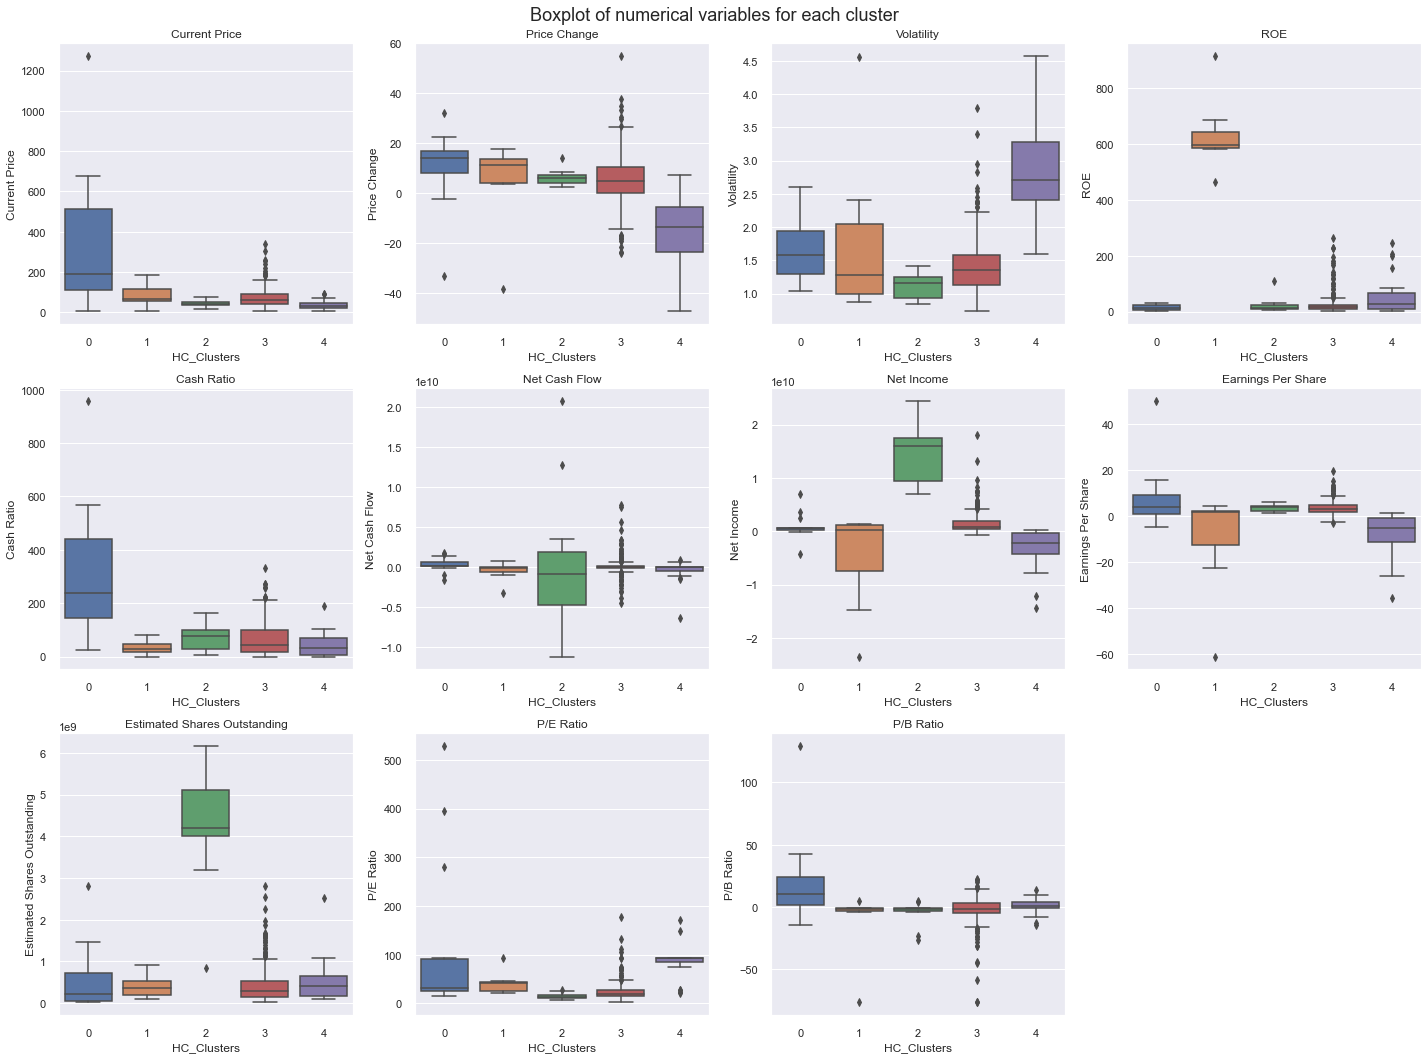

<IPython.core.display.Javascript object>

In [73]:
# Plotting subplots for all numerical columns for each cluster labels
plt.figure(figsize=(20, 15))

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y=dfhc[variable], x=dfhc["HC_Clusters"])
    plt.tight_layout()
    plt.title(variable)
    plt.suptitle("Boxplot of numerical variables for each cluster", fontsize=18)

plt.show()

#### Cluster Profiling

- **Cluster 0**:
    - Current price is highest among all other clusters
    - Average price change is also highest among all other clusters
    - Volatility is higher side but lower than cluster 4
    - ROE is on the lower side for this cluster
    - Cash Ratio is highest among all other clusters
    - Net cash flow is decent and on average similar to other clusters
    - Net income is on the lower side but still average net income is positive
    - Earning per share is highest among all clusters
    - Estimated shares outstanding is low
    - P/E ratio is higher than cluster 1, 2, 3 and lower than 4, while P/B ratio is highest among all others


- **Cluster 1**:
    - Current price of this cluster is lower than cluster 0 but higher than other clusters
    - Average price change is mid category and almost similar with cluster 3
    - Volatility is lowest for this category
    - ROE is highest for this cluster
    - Cash Ratio is lowest among all clusters
    - Net cash flow is almost similar to other clusters but slightly higher 
    - Net income is on the lower range in this cluster
    - Earning per share is on the lower side only higher than cluster 4
    - Estimated shares outstanding is low
    - P/E ratio is on the lower side but higher than cluster 2 and 3, and P/B ratio is low 


- **Cluster 2**:
    - Current price is lowest in this cluster among all other clusters
    - Average price change is low in this cluster however it's more than Cluster 0
    - Volatility is very low in this cluster
    - ROE is lowest for this cluster
    - Cash Ratio is lower than cluster 0 but higher than all other clusters
    - Net cash flow is lowest among all clusters on average
    - Net income is highest among all clusters
    - Earning per share is on the higher side but less than cluster 0
    - Estimated shares outstanding is the highest among all clusters
    - P/E ratio and P/B ratio are the lowest for this cluster
    
    
- **Cluster 3**:
    - Current price is in lower range, but higher than cluster 2 and 4
    - Average price change in this cluster is low almost similar to cluster 3
    - Volatility is medium and slightly higher than cluster 1 and 2, but less than 0 and 4
    - ROE is on lower range and comparable to cluster 1, 2 and 4
    - Cash Ratio is low and almost similar to cluster 2
    - Net cash flow is low and almost similar to other clusters except cluster 2
    - Average Net income is second highest among all clusters
    - Earning per share is second highest almost similar to cluster 1.
    - Estimated shares outstanding is on the lower side
    - P/E ratio and P/B ratio are on the lower side
    

- **Cluster 4**:
    - Current price is the lowest for this cluster
    - Average price change is on the negative and lowest among all cluster
    - Volatility is highest for this cluster
    - ROE is on lower range but slightly higher than 0,2 and 3
    - Cash Ratio is on the lower range, almost simlar to cluster 1 which is lowest
    - Net cash flow is decent and on average similar to other clusters
    - Average Net income is negative and on the lower side
    - Earning per share is lowest among all clusters
    - Estimated shares outstanding is second highest 
    - P/E ratio is highest among all clusters and P/B ratio is on the lower range

## K-means vs Hierarchical Clustering

- **Below are some comparison insights after exploring the K-means Clustering and Hierarchical Clustering on the dataset.**
    - Both of the algorithm K-Means and Agglomerative took almost similar time, since the dataset wasn't big it was very quick
    - From K-means we have seen that optimal number of clusters which provides decent variability was 5, for Hierarchical clustering we have noticed that by ward linkage method with best spread out dendogram 5 seems to be a optimal number of clusters with decent variability
    - From both clustering methods we can see one of the cluster is coming with majority number ob observations/tickers.
    - For K means cluster wise (0-4) number of observations are 29, 142, 70, 41, 58 respectively, where as for Hierarchical clustering cluster wise (0-4) number of observations are 15, 7, 11, 285, 22 respectively.
    - We can see K-means is providing better variability where as in herirarchical clustering almost ~83% of data are in one cluster and only rest ~17% is forming other clusters.
    - With K means the current price shows highest for cluster 2 which has around 70 observations, where as in hierarchical clustering the current price shows highest for cluster 0 which has only 15 observations. 
    - For price chnage K- Means shows cluster 3 has the highest price changes which has 41 observations where as in hierarchical clustering it shows cluster 0 which has only 15 observations.
    - In K-means cluster 0 shows that it has the highest volatility which has 29 observations and hierarchical clustering shows the highest volatility i cluster 4 which has 22 observations, for this feature both the clustering shows comparable counts of observations
    - For cash ratio K- Means shows cluster 3 has the highest price changes which has 41 observations where as in hierarchical clustering it shows cluster 0 which has only 15 observations.
    - For Net income K-means shows cluster 4 has the highest net income with 58 observations where as hierarchcal clustering shows cluster 2 which only has 11 observations
    - With K means the earnings per share shows highest for cluster 2 which has around 70 observations, where as in hierarchical clustering the earnings per share shows highest for cluster 0 which has only 15 observations.
    - For esimated shares outstanding K-means shows cluster 4 has the highest shares outstanding with 58 observations where as hierarchcal clustering shows cluster 2 which only has 11 observations
    - For P/E ratio K-means shows cluster 0 has the highest P/E ratio which is 29 observations, where as hierarchical clustering shows cluster 4 which has 22 records, for this clusters are more comparable in both methods.
    
    
- **With the above comparison since K-means clustering has provided the best variability among its clusters, we will prepare the recommendation and insights based on that** 

## Actionable Insights and Recommendations

- **Cluster 0 and Cluster 3:** These are the stocks which has higher volatility, with average price change is on the higher side, P/E ratio is on the higher side, but their net income is lowest or even in red(negative) and their current price is on the low to mid categories.
     - **These stocks are more suited for quick short term volume trading, as their price change is on higher side it will increase the short term gain. So these stocks should be recommended for Day traders or short term investing. Investors and traders should be made aware their nature of volatility which could potentially risk their investment. Low risk traders/Investors should not invest in these stocks**
     

- **Cluster 4:** These are the stocks which has very less volatility, though average price change is on the lower side, it has higher number of shares outstanding and net income is high and earning per share is slightly higher than others. Current price of these stocks are still low.
     - **These stocks are low risk, low cost with high potential for large growth in longterm future, should be recommended to Investors who are looking to invest early in some low cost stocks which has higher potential of growth and looking for longterm investments**
     

- **Cluster 2:** These are the stocks which are high performing, with current price on higher side, and with very less volatililty and earning per share is highest among any other stocks
    - **These are the stocks which are the best performing large cap stocks which shows consistent growth and returns, should be recommended to Investors who are looking for investments with consistent retruns and possibily don't mind average longterm growth**
    
    
- **Cluster 1:** These are the stocks which are having current price as low, even though volatilty is low, their net income, estimated shares outstanding and earning per share is low
    - **These stocks are underperforming stocks with no signs of any potential growth, so Investors should be recommended to not invest in these stocks, as they doesn't have any potential of getting any returns in short or longterm at this point of time**